In [1]:
#importing packages
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import exponnorm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Cleaning the Eyetracking Data

Here I am reading in subject 80's data. I clean and reformat the dataframe. I then read in the full data set and drop the old subject 80 and add in the new data. I also clean the complete dataset. Fixation durations were kept in the range 500- 1400. 

In [2]:
#reading in subject 80's data
sbj_df = pd.read_csv("results_sbj80.csv")
sbj_df

,width,task,task_trial,image_name,height,sbj,CURRENT_FIX_INDEX,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_DURATION,NEXT_SAC_AMPLITUDE,Condition
0,1024,aesthetic,1,demo_01.png,768,80,1,503.4,456.4,320,5.91,a
1,1024,aesthetic,1,demo_01.png,768,80,2,381.7,290.0,190,6.45,a
2,1024,aesthetic,1,demo_01.png,768,80,3,254.0,93.5,214,1.83,a
3,1024,aesthetic,1,demo_01.png,768,80,4,194.4,80.0,166,1.6,a
4,1024,aesthetic,1,demo_01.png,768,80,5,140.3,86.2,285,4.4,a
5,1024,aesthetic,1,demo_01.png,768,80,6,303.1,93.0,153,5.62,a
6,1024,aesthetic,1,demo_01.png,768,80,7,508.6,103.3,267,2.74,a
7,1024,aesthetic,1,demo_01.png,768,80,8,623.9,95.1,159,4.01,a
8,1024,aesthetic,1,demo_01.png,768,80,9,764.9,88.7,166,2.77,a
9,1024,aesthetic,1,demo_01.png,768,80,10,861.5,88.5,199,18.18,a


In [3]:
#note: locs_2 is x
#listing out the existing column names
cols = list(sbj_df.columns.values)
cols

['width',
 'task',
 'task_trial',
 'image_name',
 'height',
 'sbj',
 'CURRENT_FIX_INDEX',
 'CURRENT_FIX_X',
 'CURRENT_FIX_Y',
 'CURRENT_FIX_DURATION',
 'NEXT_SAC_AMPLITUDE',
 'Condition']

In [4]:
#choosing the columns that I need 
cols = ["sbj", "image_name", "task", "CURRENT_FIX_INDEX", "CURRENT_FIX_Y", "CURRENT_FIX_X", "CURRENT_FIX_DURATION", "NEXT_SAC_AMPLITUDE"]
sbj_df = sbj_df[cols]
sbj_df

,sbj,image_name,task,CURRENT_FIX_INDEX,CURRENT_FIX_Y,CURRENT_FIX_X,CURRENT_FIX_DURATION,NEXT_SAC_AMPLITUDE
0,80,demo_01.png,aesthetic,1,456.4,503.4,320,5.91
1,80,demo_01.png,aesthetic,2,290.0,381.7,190,6.45
2,80,demo_01.png,aesthetic,3,93.5,254.0,214,1.83
3,80,demo_01.png,aesthetic,4,80.0,194.4,166,1.6
4,80,demo_01.png,aesthetic,5,86.2,140.3,285,4.4
5,80,demo_01.png,aesthetic,6,93.0,303.1,153,5.62
6,80,demo_01.png,aesthetic,7,103.3,508.6,267,2.74
7,80,demo_01.png,aesthetic,8,95.1,623.9,159,4.01
8,80,demo_01.png,aesthetic,9,88.7,764.9,166,2.77
9,80,demo_01.png,aesthetic,10,88.5,861.5,199,18.18


In [5]:
# renaming the columns to match the full table
sbj_df = sbj_df.rename(columns= {"sbj": "subj", "image_name": "image", "CURRENT_FIX_INDEX": "fixN", "CURRENT_FIX_Y": "locs_1", "CURRENT_FIX_X": "locs_2", "CURRENT_FIX_DURATION": "durs", "NEXT_SAC_AMPLITUDE": "SCamp"})
sbj_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,80,demo_01.png,aesthetic,1,456.4,503.4,320,5.91
1,80,demo_01.png,aesthetic,2,290.0,381.7,190,6.45
2,80,demo_01.png,aesthetic,3,93.5,254.0,214,1.83
3,80,demo_01.png,aesthetic,4,80.0,194.4,166,1.6
4,80,demo_01.png,aesthetic,5,86.2,140.3,285,4.4
5,80,demo_01.png,aesthetic,6,93.0,303.1,153,5.62
6,80,demo_01.png,aesthetic,7,103.3,508.6,267,2.74
7,80,demo_01.png,aesthetic,8,95.1,623.9,159,4.01
8,80,demo_01.png,aesthetic,9,88.7,764.9,166,2.77
9,80,demo_01.png,aesthetic,10,88.5,861.5,199,18.18


In [6]:
#dropping the demo trials
demo_1 = sbj_df[(sbj_df["image"] == "demo_01.png")].index
demo_2 = sbj_df[(sbj_df["image"]== "demo_03.png")].index
drop_df = sbj_df.drop(demo_1)
clean_sbj_df = drop_df.drop(demo_2)
clean_sbj_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
203,.,.,.,1,382.3,481.8,97,.
204,80,target_kitchen_IDS01.png,aesthetic,1,389.3,533.1,516,5.01
205,80,target_kitchen_IDS01.png,aesthetic,2,516.8,398.6,233,6.8
206,80,target_kitchen_IDS01.png,aesthetic,3,368.2,587.1,299,7.02
207,80,target_kitchen_IDS01.png,aesthetic,4,332.6,840.5,319,4.36
208,80,target_kitchen_IDS01.png,aesthetic,5,314.4,995.9,468,7.37
209,80,target_kitchen_IDS01.png,aesthetic,6,493.9,775.4,250,17.37
210,80,target_kitchen_IDS01.png,aesthetic,7,322.2,157.6,285,5.01
211,80,target_kitchen_IDS01.png,aesthetic,8,159.1,75.4,169,2.94
212,80,target_kitchen_IDS01.png,aesthetic,9,61.7,45.0,411,10.13


In [7]:
#dropping empty trials
empty = clean_sbj_df[clean_sbj_df["image"] == "."].index
clean_sbj_df = clean_sbj_df.drop(empty)
clean_sbj_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
204,80,target_kitchen_IDS01.png,aesthetic,1,389.3,533.1,516,5.01
205,80,target_kitchen_IDS01.png,aesthetic,2,516.8,398.6,233,6.8
206,80,target_kitchen_IDS01.png,aesthetic,3,368.2,587.1,299,7.02
207,80,target_kitchen_IDS01.png,aesthetic,4,332.6,840.5,319,4.36
208,80,target_kitchen_IDS01.png,aesthetic,5,314.4,995.9,468,7.37
209,80,target_kitchen_IDS01.png,aesthetic,6,493.9,775.4,250,17.37
210,80,target_kitchen_IDS01.png,aesthetic,7,322.2,157.6,285,5.01
211,80,target_kitchen_IDS01.png,aesthetic,8,159.1,75.4,169,2.94
212,80,target_kitchen_IDS01.png,aesthetic,9,61.7,45.0,411,10.13
213,80,target_kitchen_IDS01.png,aesthetic,10,103.5,416.6,398,6.89


In [8]:
#cleaning the fixation durations to be greater than 50 and less than 1500
clean_sbj_df = clean_sbj_df.drop (clean_sbj_df[clean_sbj_df["durs"] < 50].index)
clean_sbj_df = clean_sbj_df.drop(clean_sbj_df[clean_sbj_df["durs"] > 1400].index)
clean_sbj_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
204,80,target_kitchen_IDS01.png,aesthetic,1,389.3,533.1,516,5.01
205,80,target_kitchen_IDS01.png,aesthetic,2,516.8,398.6,233,6.8
206,80,target_kitchen_IDS01.png,aesthetic,3,368.2,587.1,299,7.02
207,80,target_kitchen_IDS01.png,aesthetic,4,332.6,840.5,319,4.36
208,80,target_kitchen_IDS01.png,aesthetic,5,314.4,995.9,468,7.37
209,80,target_kitchen_IDS01.png,aesthetic,6,493.9,775.4,250,17.37
210,80,target_kitchen_IDS01.png,aesthetic,7,322.2,157.6,285,5.01
211,80,target_kitchen_IDS01.png,aesthetic,8,159.1,75.4,169,2.94
212,80,target_kitchen_IDS01.png,aesthetic,9,61.7,45.0,411,10.13
213,80,target_kitchen_IDS01.png,aesthetic,10,103.5,416.6,398,6.89


In [9]:
#reading in data for the other subjects
full_df = pd.read_csv("SM01_full_table_Order.csv")
full_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp,Order
0,1,target_diningroom_IDS01,memorize,1,NaN,NaN,543,3.67,1
1,1,target_diningroom_IDS01,memorize,2,384.0,677.0,336,3.90,1
2,1,target_diningroom_IDS01,memorize,3,482.0,784.0,298,4.70,1
3,1,target_diningroom_IDS01,memorize,4,526.0,613.0,215,5.77,1
4,1,target_diningroom_IDS01,memorize,5,330.0,534.0,236,0.62,1
5,1,target_diningroom_IDS01,memorize,6,321.0,508.0,321,3.50,1
6,1,target_diningroom_IDS01,memorize,7,322.0,642.0,216,5.04,1
7,1,target_diningroom_IDS01,memorize,8,363.0,832.0,389,2.38,1
8,1,target_diningroom_IDS01,memorize,9,369.0,935.0,139,8.19,1
9,1,target_diningroom_IDS01,memorize,10,99.0,796.0,276,2.29,1


In [10]:
#dropping the order column from the table
full_df = full_df.drop(["Order"], axis= 1)
#cleaning the fixation durations to be greater than 50 and less than 1500
full_df = full_df.drop (full_df[full_df["durs"] < 50].index)
full_df = full_df.drop(full_df[full_df["durs"] > 1400].index)
full_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,1,target_diningroom_IDS01,memorize,1,NaN,NaN,543,3.67
1,1,target_diningroom_IDS01,memorize,2,384.0,677.0,336,3.90
2,1,target_diningroom_IDS01,memorize,3,482.0,784.0,298,4.70
3,1,target_diningroom_IDS01,memorize,4,526.0,613.0,215,5.77
4,1,target_diningroom_IDS01,memorize,5,330.0,534.0,236,0.62
5,1,target_diningroom_IDS01,memorize,6,321.0,508.0,321,3.50
6,1,target_diningroom_IDS01,memorize,7,322.0,642.0,216,5.04
7,1,target_diningroom_IDS01,memorize,8,363.0,832.0,389,2.38
8,1,target_diningroom_IDS01,memorize,9,369.0,935.0,139,8.19
9,1,target_diningroom_IDS01,memorize,10,99.0,796.0,276,2.29


In [11]:
#dropping the old subject 80 from the full table
drop_full_df = full_df.drop(full_df[full_df["subj"]== 80].index)
drop_full_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,1,target_diningroom_IDS01,memorize,1,NaN,NaN,543,3.67
1,1,target_diningroom_IDS01,memorize,2,384.0,677.0,336,3.90
2,1,target_diningroom_IDS01,memorize,3,482.0,784.0,298,4.70
3,1,target_diningroom_IDS01,memorize,4,526.0,613.0,215,5.77
4,1,target_diningroom_IDS01,memorize,5,330.0,534.0,236,0.62
5,1,target_diningroom_IDS01,memorize,6,321.0,508.0,321,3.50
6,1,target_diningroom_IDS01,memorize,7,322.0,642.0,216,5.04
7,1,target_diningroom_IDS01,memorize,8,363.0,832.0,389,2.38
8,1,target_diningroom_IDS01,memorize,9,369.0,935.0,139,8.19
9,1,target_diningroom_IDS01,memorize,10,99.0,796.0,276,2.29


In [12]:
#joining the two dataframes together
df = pd.concat([drop_full_df, clean_sbj_df])
df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,1,target_diningroom_IDS01,memorize,1,NaN,NaN,543,3.67
1,1,target_diningroom_IDS01,memorize,2,384.0,677.0,336,3.9
2,1,target_diningroom_IDS01,memorize,3,482.0,784.0,298,4.7
3,1,target_diningroom_IDS01,memorize,4,526.0,613.0,215,5.77
4,1,target_diningroom_IDS01,memorize,5,330.0,534.0,236,0.62
5,1,target_diningroom_IDS01,memorize,6,321.0,508.0,321,3.5
6,1,target_diningroom_IDS01,memorize,7,322.0,642.0,216,5.04
7,1,target_diningroom_IDS01,memorize,8,363.0,832.0,389,2.38
8,1,target_diningroom_IDS01,memorize,9,369.0,935.0,139,8.19
9,1,target_diningroom_IDS01,memorize,10,99.0,796.0,276,2.29


In [13]:
#resorting the newly joined dataframe using subject as key
df["subj"] = df["subj"].astype(int)
df = df.sort_values("subj")
df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,1,target_diningroom_IDS01,memorize,1,NaN,NaN,543,3.67
2576,1,target_city,aesthetic,27,204.0,654.0,275,1.92
2577,1,target_city,aesthetic,28,184.0,716.0,144,2.97
2578,1,target_city,aesthetic,29,270.0,639.0,709,7.83
2579,1,target_city,aesthetic,30,101.0,405.0,417,6.85
2580,1,target_city,aesthetic,31,240.0,188.0,250,7.04
2581,1,target_city,aesthetic,32,509.0,158.0,257,2.04
2582,1,target_city,aesthetic,33,433.0,112.0,287,19.16
2583,1,target_city,aesthetic,34,498.0,824.0,304,1.56
2584,1,target_city,aesthetic,35,505.0,885.0,185,2.9


In [14]:
#df.to_csv("SM01_Final_Table.csv")

Here I am splitting the dataframe by task: the two tasks are aesthetic judgement ("aesthetic") and memorization ("memorize"). I clean the two separate dataframes by dropping the rows for first fixations and null values for the saccade amplitudes. 

In [15]:
#separating the data into two dataframes based on the task
#dropping all the memorize trials to create an aesthetic df
aes_df = df.drop(df[df["task"]== "memorize"].index)
aes_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
2599,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
2646,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2540,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
2489,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
2853,1,target_desktop,aesthetic,31,415.0,839.0,464,2.8
2721,1,target_deli,aesthetic,9,229.0,455.0,229,2.39
2739,1,target_deli,aesthetic,27,235.0,363.0,262,5.24
2126,1,target_street_IDS01,aesthetic,12,362.0,606.0,167,3.95
1975,1,target_kitchen_IDS01,aesthetic,1,NaN,NaN,312,0.89
1976,1,target_kitchen_IDS01,aesthetic,2,411.0,532.0,174,3.83


In [16]:
#removing all the aesthetic trials to create memorize df
mem_df = df.drop(df[df["task"]== "aesthetic"].index)
mem_df = mem_df.drop(mem_df[mem_df["fixN"]== 1].index)
mem_df =mem_df.drop(mem_df[mem_df["SCamp"].isnull()].index)
mem_df
#mem_df.to_csv("SM01_Retest_Memorize_Task.csv")

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
1972,1,target_arcade,memorize,41,676.0,451.0,121,9.06
1973,1,target_arcade,memorize,42,617.0,125.0,256,5.69
1971,1,target_arcade,memorize,40,659.0,739.0,142,7.71
1970,1,target_arcade,memorize,39,609.0,765.0,226,1.71
1968,1,target_arcade,memorize,37,342.0,539.0,216,3.23
1942,1,target_arcade,memorize,11,196.0,559.0,318,11.64
1943,1,target_arcade,memorize,12,478.0,904.0,172,2.12
1944,1,target_arcade,memorize,13,416.0,963.0,407,2.57
1945,1,target_arcade,memorize,14,308.0,989.0,682,9.45
1946,1,target_arcade,memorize,15,370.0,642.0,209,2.2


In [17]:
#cleaning aesthetic df
aes_df = aes_df.drop(aes_df[aes_df["fixN"]== 1].index)
aes_df = aes_df.drop(aes_df[aes_df["SCamp"].isnull()].index)
aes_df
#aes_df.to_csv("SM01_Retest_Aesthetic_Task.csv")

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
2599,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
2646,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2540,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
2489,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
2853,1,target_desktop,aesthetic,31,415.0,839.0,464,2.8
2721,1,target_deli,aesthetic,9,229.0,455.0,229,2.39
2739,1,target_deli,aesthetic,27,235.0,363.0,262,5.24
2126,1,target_street_IDS01,aesthetic,12,362.0,606.0,167,3.95
1976,1,target_kitchen_IDS01,aesthetic,2,411.0,532.0,174,3.83
1977,1,target_kitchen_IDS01,aesthetic,3,458.0,678.0,269,7.03


In [18]:
mem_df.isnull().sum()

subj      0
image     0
task      0
fixN      0
locs_1    0
locs_2    0
durs      0
SCamp     0
dtype: int64

In [19]:
aes_df.isnull().sum()

subj      0
image     0
task      0
fixN      0
locs_1    0
locs_2    0
durs      0
SCamp     0
dtype: int64

## Ex-Gaussian Parameters (R Retimes Version)

I read in the tables with the Ex-Gaussian parameters that were created in R. I find the raw means and the fitted means for both tasks.

In [149]:
#reading in r result comparison (aesthetic)
r_df = pd.read_csv("Aesthetic_Retest_Gauss.csv")
r_df

,mu,sig,tau,subject
0,142.443092,39.936263,127.313788,1
1,153.267806,42.519420,125.096983,2
2,147.580308,42.932562,116.781328,3
3,208.951028,66.551975,175.292647,4
4,147.970036,56.856559,131.537101,5
5,141.557436,40.414007,102.364968,6
6,147.460961,36.767607,192.825549,7
7,184.799738,46.683493,104.118802,8
8,188.172424,51.973978,108.490926,9
9,142.533082,36.912419,114.223494,10


In [21]:
#raw mean and fitted means for the aesthetic task
raw_mean = aes_df.durs.mean()
mu_mean = r_df["mu"].mean()
sig_mean = r_df["sig"].mean()
tau_mean = r_df["tau"].mean()
print (raw_mean, mu_mean, sig_mean, tau_mean)

285.20342609676095 160.16368647623833 48.029534231993374 128.8833125514053


In [152]:
aes_df = pd.read_csv("SM01_Retest_Aesthetic_Task.csv")
aes_df

,Unnamed: 0,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,2599,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
1,2646,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2,2540,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
3,2489,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
4,2853,1,target_desktop,aesthetic,31,415.0,839.0,464,2.80
5,2721,1,target_deli,aesthetic,9,229.0,455.0,229,2.39
6,2739,1,target_deli,aesthetic,27,235.0,363.0,262,5.24
7,2126,1,target_street_IDS01,aesthetic,12,362.0,606.0,167,3.95
8,1976,1,target_kitchen_IDS01,aesthetic,2,411.0,532.0,174,3.83
9,1977,1,target_kitchen_IDS01,aesthetic,3,458.0,678.0,269,7.03


In [139]:
import scipy.stats

In [140]:
r_mem_df = pd.read_csv("Memorize_Retest_Gauss.csv")
r_mem_df

,mu,sig,tau,subject
0,136.765962,36.553955,114.650537,1
1,158.130049,46.087619,106.811566,2
2,122.560264,42.555903,105.085718,3
3,193.751358,70.791642,174.458505,4
4,147.001752,60.338376,116.974655,5
5,134.048748,38.596456,124.016891,6
6,126.701981,39.572842,186.167076,7
7,177.378133,50.789348,107.574759,8
8,186.297472,54.116002,118.810707,9
9,130.047102,36.133855,123.852895,10


In [153]:
mem_df = pd.read_csv("SM01_Retest_Memorize_Task.csv")
mem_df

,Unnamed: 0,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,1972,1,target_arcade,memorize,41,676.0,451.0,121,9.06
1,1973,1,target_arcade,memorize,42,617.0,125.0,256,5.69
2,1971,1,target_arcade,memorize,40,659.0,739.0,142,7.71
3,1970,1,target_arcade,memorize,39,609.0,765.0,226,1.71
4,1968,1,target_arcade,memorize,37,342.0,539.0,216,3.23
5,1942,1,target_arcade,memorize,11,196.0,559.0,318,11.64
6,1943,1,target_arcade,memorize,12,478.0,904.0,172,2.12
7,1944,1,target_arcade,memorize,13,416.0,963.0,407,2.57
8,1945,1,target_arcade,memorize,14,308.0,989.0,682,9.45
9,1946,1,target_arcade,memorize,15,370.0,642.0,209,2.2


In [26]:
raw_mem_mean = mem_df.durs.mean()
mu_mem_mean = r_mem_df["mu"].mean()
sig_mem_mean = r_mem_df["sig"].mean()
tau_mem_mean = r_mem_df["tau"].mean()
print (raw_mem_mean, mu_mem_mean, sig_mem_mean, tau_mem_mean)

287.38759750593516 150.24546451759824 46.65622717227695 141.1204301455788


In [27]:
import seaborn as sns

## T-tests for tasks

Here I am comparing the mu, tau, and sigma for the two tasks (aesthetic judgement and memorization)

In [28]:
#t-test for the aesthetic and memorize task 
t, p = stats.ttest_ind(r_df.mu, r_mem_df.mu)
print(t)
print(p)

4.5548400780470715
1.4963923045429137e-05


In [29]:
#t-test for the sigma
t, p = stats.ttest_ind(r_df.sig, r_mem_df.sig)
print(t)
print(p)

1.6392831321868582
0.10432840460893271


In [30]:
#t-test
t, p = stats.ttest_ind(r_df.tau, r_mem_df.tau)
print(t)
print(p)

-4.946032243015239
3.1003468959786383e-06


## Reshaping Data for Models

I read in the working memory scores and z-score them. I rearrange the dataframes to create a long form df with subject, mu, tau, sigma, OSPAN, RAPM, and average saccade amplitude. 

In [142]:
#reading in WM measures
wm_df= pd.read_csv("SM01_RAPM_OSPAN.csv")
wm_df

,SBJ_NO,RAPM,OSPAN
0,1,9,2
1,2,4,3
2,3,8,4
3,4,5,4
4,5,10,5
5,6,2,5
6,7,3,5
7,8,8,5
8,9,8,5
9,10,7,0


In [143]:
from scipy.stats import zscore

In [144]:
#selecting just the OSPAN and RAPM columns
z_df = wm_df[["OSPAN", "RAPM"]]
z_df

,OSPAN,RAPM
0,2,9
1,3,4
2,4,8
3,4,5
4,5,10
5,5,2
6,5,3
7,5,8
8,5,8
9,0,7


In [145]:
#applying the zscore function to the OSPAN and RAPM columns
z_df = z_df.apply(zscore)
z_df 

,OSPAN,RAPM
0,-0.452589,1.350801
1,0.169721,-0.621608
2,0.792030,0.956320
3,0.792030,-0.227126
4,1.414339,1.745283
5,1.414339,-1.410571
6,1.414339,-1.016089
7,1.414339,0.956320
8,1.414339,0.956320
9,-1.697207,0.561838


In [146]:
#dropping subject 86
rdrop_df = r_df.drop(r_df[r_df["subject"] == 86].index)
rdrop_df = rdrop_df.reset_index(drop = True)
rdrop_df

,mu,sig,tau,log_like,aic,bic,subject
0,145.205206,45.484344,125.662679,-2531.493503,5068.987006,5081.064604,1
1,154.171028,42.664209,124.414098,-8725.340868,17456.681737,17472.471726,2
2,145.483396,43.435148,118.041646,-11315.995455,22637.990910,22654.583959,3
3,203.757178,64.365950,179.668099,-8283.573845,16573.147689,16588.606844,4
4,146.715656,56.669066,132.566300,-8703.356883,17412.713766,17428.437865,5
5,141.143512,40.795060,101.534821,-11669.219122,23344.438244,23361.178812,6
6,146.472579,36.752546,193.441065,-8220.441804,16446.883608,16462.345109,7
7,184.414116,49.193207,104.085826,-9278.191509,18562.383017,18578.407469,8
8,186.875815,50.887235,110.072915,-9861.598712,19729.197424,19745.373518,9
9,140.026759,34.980574,115.611312,-11866.790827,23739.581655,23756.345106,10


In [147]:
#cleaning the data to find average saccade amplitude for each subject
s_df = aes_df[["subj", "SCamp"]]
s_df = s_df.groupby("subj").mean()
s_df = s_df.reset_index()
s_df = s_df.drop(s_df[s_df["subj"] == 86].index)
s_df = s_df.reset_index(drop = True)
s_df = s_df[["SCamp"]]
s_df

,SCamp
0,4.607705
1,4.350217
2,4.196172
3,4.622512
4,5.075996
5,4.744921
6,3.687005
7,4.215256
8,5.270961
9,2.570770


In [148]:
#aesthetic task: merging together the ex-gauss parameters, z-scored working memory scores, and avg saccade amplitudes
aes_final_df = pd.concat([rdrop_df, z_df], axis =1)
aes_final_df = pd.concat([aes_final_df, s_df], axis =1)
aes_final_df

,mu,sig,tau,log_like,aic,bic,subject,OSPAN,RAPM,SCamp
0,145.205206,45.484344,125.662679,-2531.493503,5068.987006,5081.064604,1,-0.452589,1.350801,4.607705
1,154.171028,42.664209,124.414098,-8725.340868,17456.681737,17472.471726,2,0.169721,-0.621608,4.350217
2,145.483396,43.435148,118.041646,-11315.995455,22637.990910,22654.583959,3,0.792030,0.956320,4.196172
3,203.757178,64.365950,179.668099,-8283.573845,16573.147689,16588.606844,4,0.792030,-0.227126,4.622512
4,146.715656,56.669066,132.566300,-8703.356883,17412.713766,17428.437865,5,1.414339,1.745283,5.075996
5,141.143512,40.795060,101.534821,-11669.219122,23344.438244,23361.178812,6,1.414339,-1.410571,4.744921
6,146.472579,36.752546,193.441065,-8220.441804,16446.883608,16462.345109,7,1.414339,-1.016089,3.687005
7,184.414116,49.193207,104.085826,-9278.191509,18562.383017,18578.407469,8,1.414339,0.956320,4.215256
8,186.875815,50.887235,110.072915,-9861.598712,19729.197424,19745.373518,9,1.414339,0.956320,5.270961
9,140.026759,34.980574,115.611312,-11866.790827,23739.581655,23756.345106,10,-1.697207,0.561838,2.570770


In [151]:
aes_final_df = pd.read_csv("Aes_Final.csv")

## Models (Aesthetic and Retimes Version)

Running the mixed linear effects model for the aesthetic trials.  

In [160]:
#mixed lm for aesthetic task: WM on x axis, mu on y axis
aes_mu = smf.mixedlm("mu ~ OSPAN + RAPM + task + task * OSPAN + task * RAPM", final_cat_df, groups=final_cat_df["subject"])
aes_mu_f = aes_mu.fit()
print(aes_mu_f.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     mu       
No. Observations:      198         Method:                 REML     
No. Groups:            99          Scale:                  810.7191 
Min. group size:       2           Likelihood:             -968.2454
Max. group size:       2           Converged:              Yes      
Mean group size:       2.0                                          
--------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              150.662    3.651 41.270 0.000 143.507 157.817
task[T.memorize]       -16.736    4.047 -4.135 0.000 -24.668  -8.804
OSPAN                    4.438    3.660  1.212 0.225  -2.736  11.613
task[T.memorize]:OSPAN   0.604    4.058  0.149 0.882  -7.350   8.557
RAPM                     4.883    3.660  1.334 0.1

In [39]:
#mixed lm for aesthetic task: WM on x axis, sigma on y axis
aes_sig = smf.mixedlm("sig ~ OSPAN + RAPM", aes_final_df, groups=aes_final_df["subject"])
aes_sig_f = aes_sig.fit()
print(aes_sig_f.summary())

/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sig      
No. Observations: 99      Method:             REML     
No. Groups:       99      Scale:              42.2814  
Min. group size:  1       Likelihood:         -356.1078
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    47.964    0.496 96.747 0.000 46.992 48.935
OSPAN        -0.438    0.793 -0.552 0.581 -1.993  1.117
RAPM         -0.203    0.912 -0.223 0.823 -1.990  1.583
Group Var    42.281                                    



In [40]:
#mixed lm for aesthetic task: WM on x axis, tau on y axis
aes_tau = smf.mixedlm("tau ~ OSPAN + RAPM", aes_final_df, groups=aes_final_df["subject"])
aes_tau_f = aes_tau.fit()
print(aes_tau_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: tau      
No. Observations: 99      Method:             REML     
No. Groups:       99      Scale:              571.8351 
Min. group size:  1       Likelihood:         -481.1240
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 129.119    1.967 65.627 0.000 125.263 132.975
OSPAN      -0.443    2.793 -0.159 0.874  -5.916   5.030
RAPM       -1.680    3.406 -0.493 0.622  -8.355   4.994
Group Var 571.835                                      



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [41]:
#mixed lm for aesthetic task: WM on x axis, avg saccade amplitude on y axis
aes_s = smf.mixedlm("SCamp ~ OSPAN + RAPM", aes_final_df, groups=aes_final_df["subject"])
aes_s_f = aes_s.fit()
print(aes_s_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 99      Method:             REML     
No. Groups:       99      Scale:              0.2663   
Min. group size:  1       Likelihood:         -112.8632
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef. Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.636    0.014 322.384 0.000  4.607  4.664
OSPAN        0.122    0.072   1.696 0.090 -0.019  0.264
RAPM         0.049    0.074   0.672 0.501 -0.095  0.194
Group Var    0.266                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


## Reshaping Data for Models (Memorize)

Repeating the same process as above, but now for the memorize task. 

In [42]:
#dropping subject 86 for memory task
rmdrop_df = r_mem_df.drop(r_mem_df[r_mem_df["subject"] == 86].index)
rmdrop_df = rmdrop_df.reset_index(drop = True)
rmdrop_df

,mu,sig,tau,subject
0,136.765962,36.553955,114.650537,1
1,158.130049,46.087619,106.811566,2
2,122.560264,42.555903,105.085718,3
3,193.751358,70.791642,174.458505,4
4,147.001752,60.338376,116.974655,5
5,134.048748,38.596456,124.016891,6
6,126.701981,39.572842,186.167076,7
7,177.378133,50.789348,107.574759,8
8,186.297472,54.116002,118.810707,9
9,130.047102,36.133855,123.852895,10


In [43]:
#cleaning data for memory task to find average saccade amplitude for each subject
sm_df = mem_df[["subj", "SCamp"]]
sm_df["SCamp"] = pd.to_numeric(sm_df["SCamp"], errors="coerce")
sm_df = sm_df.groupby("subj").mean()
sm_df = sm_df.reset_index()
sm_df = sm_df.drop(sm_df[sm_df["subj"] == 86].index)
sm_df = sm_df.reset_index(drop = True)
sm_df = sm_df[["SCamp"]]
sm_df

/Users/zoeloh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SCamp
0,4.679519
1,4.817836
2,3.981049
3,4.165634
4,4.686260
5,4.123028
6,3.670511
7,3.653761
8,4.789211
9,2.826130


In [44]:
#memory task: merging together ex-gaussian parameters, WM measures, avg saccade amplitudes
mem_final_df = pd.concat([rmdrop_df, z_df], axis =1)
mem_final_df = pd.concat([mem_final_df, sm_df], axis =1)
mem_final_df

,mu,sig,tau,subject,OSPAN,RAPM,SCamp
0,136.765962,36.553955,114.650537,1,-0.452589,1.350801,4.679519
1,158.130049,46.087619,106.811566,2,0.169721,-0.621608,4.817836
2,122.560264,42.555903,105.085718,3,0.792030,0.956320,3.981049
3,193.751358,70.791642,174.458505,4,0.792030,-0.227126,4.165634
4,147.001752,60.338376,116.974655,5,1.414339,1.745283,4.686260
5,134.048748,38.596456,124.016891,6,1.414339,-1.410571,4.123028
6,126.701981,39.572842,186.167076,7,1.414339,-1.016089,3.670511
7,177.378133,50.789348,107.574759,8,1.414339,0.956320,3.653761
8,186.297472,54.116002,118.810707,9,1.414339,0.956320,4.789211
9,130.047102,36.133855,123.852895,10,-1.697207,0.561838,2.826130


In [150]:
mem_final_df = pd.read_csv("Mem_Final.csv")
mem_final_df

## Models (Memorize and Retimes Version)

In [45]:
#mixed lm for memory task: WM on the x axis, mu on the y axis
mem_mu = smf.mixedlm("mu ~ OSPAN + RAPM", mem_final_df, groups=mem_final_df["subject"])
mem_mu_f = mem_mu.fit()
print(mem_mu_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: mu       
No. Observations:  99      Method:             REML     
No. Groups:        99      Scale:              214.3148 
Min. group size:   1       Likelihood:         -434.0166
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 150.035    1.254 119.602 0.000 147.576 152.494
OSPAN       1.835    1.675   1.096 0.273  -1.447   5.118
RAPM        1.726    2.068   0.834 0.404  -2.327   5.779
Group Var 214.315                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [46]:
#mixed lm for memory task: WM on the x axis, sigma on the y axis
mem_sig = smf.mixedlm("sig ~ OSPAN + RAPM", mem_final_df, groups=mem_final_df["subject"])
mem_sig_f = mem_sig.fit()
print(mem_sig_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sig      
No. Observations: 99      Method:             REML     
No. Groups:       99      Scale:              44.3308  
Min. group size:  1       Likelihood:         -358.3798
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   46.669    0.262 178.389 0.000 46.157 47.182
OSPAN       -0.253    0.913  -0.278 0.781 -2.042  1.536
RAPM         0.561    0.949   0.591 0.554 -1.298  2.420
Group Var   44.331                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [47]:
#mixed lm for memory task: WM on the x axis, tau on the y axis
mem_tau = smf.mixedlm("tau ~ OSPAN + RAPM", mem_final_df, groups=mem_final_df["subject"])
mem_tau_f = mem_tau.fit()
print(mem_tau_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: tau      
No. Observations:  99      Method:             REML     
No. Groups:        99      Scale:              581.3310 
Min. group size:   1       Likelihood:         -481.9145
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 141.413    0.677 209.016 0.000 140.087 142.739
OSPAN      -4.272    3.369  -1.268 0.205 -10.875   2.331
RAPM       -2.517    3.435  -0.733 0.464  -9.250   4.215
Group Var 581.331                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [48]:
#mixed lm for memory task: WM on the x axis, avg saccade amplitude on the y axis
mem_s = smf.mixedlm("SCamp ~ OSPAN + RAPM", mem_final_df, groups=mem_final_df["subject"])
mem_s_f = mem_s.fit()
print(mem_s_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 99      Method:             REML     
No. Groups:       99      Scale:              0.3012   
Min. group size:  1       Likelihood:         -118.7839
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef. Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.484    0.011 408.362 0.000  4.463  4.506
OSPAN        0.079    0.077   1.025 0.305 -0.072  0.231
RAPM         0.035    0.078   0.442 0.658 -0.119  0.188
Group Var    0.301                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


## Reshaping Data and Running OLS Models to Check Task Effect

In [154]:
aes_task = aes_df[["task"]]
aes_task = aes_task[:99]
aes_task

,task
0,aesthetic
1,aesthetic
2,aesthetic
3,aesthetic
4,aesthetic
5,aesthetic
6,aesthetic
7,aesthetic
8,aesthetic
9,aesthetic


In [155]:
aes_cat_df = pd.concat([aes_final_df, aes_task], axis =1)
aes_cat_df

,Unnamed: 0,mu,sig,tau,subject,OSPAN,RAPM,SCamp,task
0,0,139.289922,38.600254,137.103625,1,-0.452589,1.350801,4.597428,aesthetic
1,1,143.607226,45.817796,151.043121,2,0.169721,-0.621608,4.349814,aesthetic
2,2,143.735830,53.293427,121.496599,3,0.792030,0.956320,4.172530,aesthetic
3,3,202.051800,83.904973,186.892585,4,0.792030,-0.227126,4.560887,aesthetic
4,4,140.110171,68.715144,136.169907,5,1.414339,1.745283,5.057850,aesthetic
5,5,139.067313,46.503246,105.864336,6,1.414339,-1.410571,4.742451,aesthetic
6,6,142.705261,39.962266,217.261709,7,1.414339,-1.016089,3.663812,aesthetic
7,7,184.949539,49.512892,104.615919,8,1.414339,0.956320,4.214247,aesthetic
8,8,185.665042,58.283260,113.307012,9,1.414339,0.956320,5.262476,aesthetic
9,9,143.701689,45.364326,111.122194,10,-1.697207,0.561838,2.559774,aesthetic


In [156]:
mem_task = mem_df[["task"]]
mem_task = mem_task[:99]
mem_task

,task
0,memorize
1,memorize
2,memorize
3,memorize
4,memorize
5,memorize
6,memorize
7,memorize
8,memorize
9,memorize


In [157]:
mem_cat_df = pd.concat([mem_final_df, mem_task], axis =1)
mem_cat_df

,Unnamed: 0,mu,sig,tau,subject,OSPAN,RAPM,SCamp,task
0,0,136.160450,4.447544e+01,112.898111,1,-0.452589,1.350801,4.690696,memorize
1,1,154.957849,4.842718e+01,113.342569,2,0.169721,-0.621608,4.808545,memorize
2,2,118.394775,5.488973e+01,102.484814,3,0.792030,0.956320,3.909995,memorize
3,3,182.219917,8.743388e+01,189.854234,4,0.792030,-0.227126,4.102678,memorize
4,4,142.342767,6.979172e+01,118.141285,5,1.414339,1.745283,4.718520,memorize
5,5,129.939400,4.722828e+01,129.391193,6,1.414339,-1.410571,4.107729,memorize
6,6,18.934767,5.261237e-02,331.788524,7,1.414339,-1.016089,3.646987,memorize
7,7,177.919460,5.337851e+01,106.428872,8,1.414339,0.956320,3.655504,memorize
8,8,185.294937,6.273980e+01,120.203851,9,1.414339,0.956320,4.779896,memorize
9,9,128.828610,4.562957e+01,121.867674,10,-1.697207,0.561838,2.814010,memorize


In [158]:
final_cat_df = pd.concat([aes_cat_df, mem_cat_df], axis =0, ignore_index = True)
final_cat_df

,Unnamed: 0,mu,sig,tau,subject,OSPAN,RAPM,SCamp,task
0,0,139.289922,3.860025e+01,137.103625,1,-0.452589,1.350801,4.597428,aesthetic
1,1,143.607226,4.581780e+01,151.043121,2,0.169721,-0.621608,4.349814,aesthetic
2,2,143.735830,5.329343e+01,121.496599,3,0.792030,0.956320,4.172530,aesthetic
3,3,202.051800,8.390497e+01,186.892585,4,0.792030,-0.227126,4.560887,aesthetic
4,4,140.110171,6.871514e+01,136.169907,5,1.414339,1.745283,5.057850,aesthetic
5,5,139.067313,4.650325e+01,105.864336,6,1.414339,-1.410571,4.742451,aesthetic
6,6,142.705261,3.996227e+01,217.261709,7,1.414339,-1.016089,3.663812,aesthetic
7,7,184.949539,4.951289e+01,104.615919,8,1.414339,0.956320,4.214247,aesthetic
8,8,185.665042,5.828326e+01,113.307012,9,1.414339,0.956320,5.262476,aesthetic
9,9,143.701689,4.536433e+01,111.122194,10,-1.697207,0.561838,2.559774,aesthetic


Here I am running OLS regression models to check for a task effect

In [63]:
cat_tau = smf.ols(formula = "tau ~ OSPAN + RAPM + task", data = final_cat_df)
cat_tau_f = cat_tau.fit()
print(cat_tau_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    tau   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.793
Date:                Mon, 02 Dec 2019   Prob (F-statistic):             0.0416
Time:                        01:05:02   Log-Likelihood:                -976.23
No. Observations:                 198   AIC:                             1960.
Df Residuals:                     194   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          129.1192      3.401  

In [64]:
cat_mu = smf.ols(formula = "mu ~ OSPAN + RAPM + task", data = final_cat_df)
cat_mu_f = cat_mu.fit()
print(cat_mu_f.summary())

                            OLS Regression Results                            
Dep. Variable:                     mu   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.242
Date:                Mon, 02 Dec 2019   Prob (F-statistic):            0.00625
Time:                        11:36:22   Log-Likelihood:                -886.56
No. Observations:                 198   AIC:                             1781.
Df Residuals:                     194   BIC:                             1794.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          160.0417      2.163  

In [65]:
cat_sig = smf.ols(formula = "sig ~ OSPAN + RAPM + task", data = final_cat_df)
cat_sig_f = cat_sig.fit()
print(cat_sig_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    sig   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4313
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.731
Time:                        11:37:32   Log-Likelihood:                -719.77
No. Observations:                 198   AIC:                             1448.
Df Residuals:                     194   BIC:                             1461.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           47.9638      0.931  

### Raw Correlations

In [67]:
#raw correlation between the two tasks for mu
aes_final_df["mu"].corr(mem_final_df["mu"])

0.4851015282662215

In [68]:
#raw correlation between the two tasks for sigma
aes_final_df["sig"].corr(mem_final_df["sig"])

0.5875559416085846

In [69]:
#raw correlation between the two tasks for tau
aes_final_df["tau"].corr(mem_final_df["tau"])

0.7300955390893092

In [70]:
#raw correlation between the two tasks for mean saccade amplitude
aes_final_df["SCamp"].corr(mem_final_df["SCamp"])

0.8097264568362614

## Reshaping Data for QMPE 

In [73]:
aes_durs_df = aes_df[["subj","durs"]]
aes_durs_df

,subj,durs
0,1,175
1,1,291
2,1,165
3,1,122
4,1,464
5,1,229
6,1,262
7,1,167
8,1,174
9,1,269


In [92]:
aes_drop_df = aes_durs_df.drop(aes_durs_df[aes_durs_df["subj"] > 1].index)
aes_drop_df
aes_drop_df.to_csv("Aes_Single.dat", sep = '\t', encoding='utf-8', header = False, index = False)

In [79]:
aes_durs_df.to_csv("Aes_Durs.dat", sep = '\t', encoding='utf-8', header = False, index = False)

In [77]:
mem_durs_df = mem_df[["subj", "durs"]]
mem_durs_df

,subj,durs
0,1,121
1,1,256
2,1,142
3,1,226
4,1,216
5,1,318
6,1,172
7,1,407
8,1,682
9,1,209


In [78]:
mem_durs_df.to_csv("Mem_Durs.dat", index = False)

In [2]:
aes_durs_df = pd.read_csv("Aes_Durs.dat", delim_whitespace = True, header = None)
aes_durs_df[0].nunique()

100

In [3]:
aes_durs_df

,0,1
0,1,175
1,1,291
2,1,165
3,1,122
4,1,464
5,1,229
6,1,262
7,1,167
8,1,174
9,1,269


In [4]:
trial_number = aes_durs_df.groupby([0]).size()
trial_number = trial_number.reset_index(name = "count")
trial_number.columns.values[0] = "Subject"
trial_number

,Subject,count
0,1,414
1,2,1427
2,3,1865
3,4,1278
4,5,1396
5,6,1959
6,7,1279
7,8,1543
8,9,1623
9,10,1974


In [5]:
#we are dropping subject 80 due to a small number of trials
aes_durs_df = aes_durs_df.drop(aes_durs_df[aes_durs_df[0]== 80].index)

In [6]:
aes_durs_df

,0,1
0,1,175
1,1,291
2,1,165
3,1,122
4,1,464
5,1,229
6,1,262
7,1,167
8,1,174
9,1,269


In [7]:
trial_number = aes_durs_df.groupby([0]).size()
trial_number = trial_number.reset_index(name = "count")
trial_number.columns.values[0] = "Subject"
trial_number

,Subject,count
0,1,414
1,2,1427
2,3,1865
3,4,1278
4,5,1396
5,6,1959
6,7,1279
7,8,1543
8,9,1623
9,10,1974


In [9]:
test_df = pd.DataFrame()
test_df = test_df.append(aes_durs_df.iloc[0])
test_df

,0,1
0,1.0,175.0


In [10]:
from tqdm import tqdm

Due to the fact that QMPE had a cut-off point at 1200 trials, we split subjects that had greater than 1200 trials into two dataframes. Subjects with less than 1200 had all trials copied into both dataframes.

In [51]:
#need to pick out subjects that a greater number of trials than 1200
split_sub_list = []
for idx, row in trial_number.iterrows():
    if row["count"] > 1200:
        split_sub_list.append(row["Subject"])

#if greater than 1200, need to divide number of trials in two, rounding if odd 
#creating the two empty dataframes 
first_df = pd.DataFrame()
second_df = pd.DataFrame()

#looping through the split sub list to pull out number of trials in the trial_number df
#using the halved trial number and pulling that many trials from the qmpe input df
for sub in (split_sub_list):
    sub_row = trial_number.loc[trial_number["Subject"] == sub]
    trials = sub_row["count"].values[0]
    split_trial = round(trials/2).astype(int)
    sub_trials = aes_durs_df.loc[aes_durs_df[0] == sub]
    first_df = first_df.append(sub_trials.iloc[:(split_trial)])
    second_df = second_df.append(sub_trials.iloc[(split_trial):])
    
#picking out subjects that do not need to be split- less than 1200 trials
whole_sub_list = []
for idx, row in trial_number.iterrows():
    if row["count"] < 1200:
        whole_sub_list.append(row["Subject"])
        
#looping through whole sub list and duplicating the trials into both dfs
for whole_sub in whole_sub_list:
    whole_sub_trials = aes_durs_df.loc[aes_durs_df[0] == whole_sub]
    first_df = first_df.append(whole_sub_trials)
    second_df = second_df.append(whole_sub_trials)

first_df = first_df.sort_values(by = [0])
second_df = second_df.sort_values(by = [0])
#two separate data frames: if no splitting then duplicate, if splitting then half in each
#then merging the two dataframes back together using subject code to find average

In [35]:
test_loc = aes_durs_df.loc[aes_durs_df[0] ==1]
first_loc = test_loc.iloc[:5]
sec_loc = test_loc.iloc[5:10]
print(first_loc, sec_loc)

   0    1
0  1  175
1  1  291
2  1  165
3  1  122
4  1  464    0    1
5  1  229
6  1  262
7  1  167
8  1  174
9  1  269


In [36]:
first_loc

,0,1
0,1,175
1,1,291
2,1,165
3,1,122
4,1,464


In [37]:
sec_loc

,0,1
5,1,229
6,1,262
7,1,167
8,1,174
9,1,269


In [52]:
first_df

,0,1
0,1,175
284,1,369
283,1,175
281,1,283
280,1,173
279,1,236
278,1,156
277,1,237
276,1,235
275,1,248


In [53]:
second_df

,0,1
0,1,175
284,1,369
283,1,175
281,1,283
280,1,173
279,1,236
278,1,156
277,1,237
276,1,235
275,1,248


In [57]:
first_df.to_csv("First_Aes_Durs.dat", sep = '\t', encoding='utf-8', header = False, index = False)
second_df.to_csv("Second_Aes_Durs.dat", sep = '\t', encoding='utf-8', header = False, index = False)

Reading in the two QMPE output files and then merging them back together by averaging.

In [29]:
first_qmpe_aes_df = pd.read_csv("First_Aes_QMPE.par", delim_whitespace = True, skipinitialspace= True, encoding = "utf-8", header = None)
first_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,414,4,1,7,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2,714,4,1,12,153.995094,45.045015,120.039014,6.043701,8.694684,9.109922,0.658028,-0.794947,-0.651366,-1149.190458,0.0,0.0,256.224999,66.542106
2,3,2,932,4,3,6,153.001342,39.615024,114.452335,4.913026,7.927840,7.571389,0.681044,-0.796826,-0.669468,-1500.485254,0.0,0.0,250.200000,62.704346
3,4,2,639,4,1,8,213.013984,77.889287,171.637402,10.330899,11.657121,14.553981,0.650022,-0.810854,-0.649180,-1028.552997,0.0,0.0,361.500000,99.747457
4,5,2,698,4,1,3,154.165953,68.673061,107.565240,8.921865,7.364823,11.599472,0.701782,-0.876091,-0.720635,-1124.029718,0.0,0.0,249.625000,68.353872
5,6,2,980,4,1,11,143.484214,34.652166,99.499479,3.898822,5.940413,6.039967,0.619547,-0.768792,-0.612827,-1577.309928,0.0,0.0,227.875001,54.770401
6,7,2,640,4,1,10,158.541680,43.327864,147.715058,5.787376,9.162541,9.624705,0.492788,-0.694215,-0.485786,-1032.678212,0.0,0.0,282.500000,80.915852
7,8,2,772,4,1,8,190.333462,58.750314,96.762468,7.999965,7.936148,10.545773,0.761221,-0.892487,-0.780574,-1242.483608,0.0,0.0,275.500000,61.408918
8,9,2,812,4,3,5,197.303480,45.332911,107.447862,5.671476,7.560361,8.232702,0.680643,-0.819283,-0.683623,-1306.862095,0.0,0.0,289.475000,61.212556
9,10,2,987,4,1,8,139.460380,34.245437,117.834853,4.388023,8.644135,7.159869,0.677527,-0.776989,-0.658449,-1589.817757,0.0,0.0,238.825000,62.923302


In [30]:
second_qmpe_aes_df = pd.read_csv("Second_Aes_QMPE.par", delim_whitespace = True, skipinitialspace= True, encoding = "utf-8", header = None)
second_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,414,4,1,7,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2,713,4,1,8,154.730215,39.600300,121.672962,5.316195,8.633090,8.432245,0.612656,-0.757833,-0.602465,-1147.536867,0.0,0.0,257.550000,66.185139
2,3,2,933,4,1,7,147.263710,41.740064,109.001773,4.948601,7.094096,7.407199,0.670822,-0.803674,-0.665940,-1501.724344,0.0,0.0,240.224999,60.602821
3,4,2,639,4,1,7,213.528494,78.616294,173.159787,10.573060,12.031877,14.956525,0.661822,-0.816547,-0.660040,-1028.429011,0.0,0.0,362.799999,100.133537
4,5,2,698,4,1,4,152.585989,45.955760,138.767527,6.045433,9.188125,9.545523,0.588334,-0.748004,-0.576764,-1123.493193,0.0,0.0,269.925000,75.789294
5,6,2,979,4,1,11,142.064058,34.204042,98.574188,3.891228,6.002821,6.030800,0.628159,-0.772409,-0.620920,-1575.648004,0.0,0.0,225.650000,54.128572
6,7,2,639,4,3,6,142.783252,31.403270,202.926576,6.000268,39.750149,13.655154,0.509246,-0.668489,-0.635010,-1028.591795,0.0,0.0,310.000001,106.530981
7,8,2,771,4,1,11,195.341923,55.473637,87.723136,7.713353,7.502833,10.098733,0.772561,-0.901105,-0.794238,-1240.885063,0.0,0.0,272.725000,56.498025
8,9,2,811,4,1,7,183.200162,65.023478,100.282028,8.801050,7.818753,11.442002,0.769147,-0.903157,-0.788479,-1306.044577,0.0,0.0,271.925001,64.879017
9,10,2,987,4,1,13,138.643618,16.613229,119.738183,2.549825,22.583651,6.332899,0.356396,-0.595242,-0.624444,-1588.529305,0.0,0.0,237.275001,62.681551


In [10]:
second_df.nunique()

NameError: name 'second_df' is not defined

In [31]:
both_qmpe_aes_df = pd.concat([first_qmpe_aes_df, second_qmpe_aes_df])
both_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,414,4,1,7,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2,714,4,1,12,153.995094,45.045015,120.039014,6.043701,8.694684,9.109922,0.658028,-0.794947,-0.651366,-1149.190458,0.0,0.0,256.224999,66.542106
2,3,2,932,4,3,6,153.001342,39.615024,114.452335,4.913026,7.927840,7.571389,0.681044,-0.796826,-0.669468,-1500.485254,0.0,0.0,250.200000,62.704346
3,4,2,639,4,1,8,213.013984,77.889287,171.637402,10.330899,11.657121,14.553981,0.650022,-0.810854,-0.649180,-1028.552997,0.0,0.0,361.500000,99.747457
4,5,2,698,4,1,3,154.165953,68.673061,107.565240,8.921865,7.364823,11.599472,0.701782,-0.876091,-0.720635,-1124.029718,0.0,0.0,249.625000,68.353872
5,6,2,980,4,1,11,143.484214,34.652166,99.499479,3.898822,5.940413,6.039967,0.619547,-0.768792,-0.612827,-1577.309928,0.0,0.0,227.875001,54.770401
6,7,2,640,4,1,10,158.541680,43.327864,147.715058,5.787376,9.162541,9.624705,0.492788,-0.694215,-0.485786,-1032.678212,0.0,0.0,282.500000,80.915852
7,8,2,772,4,1,8,190.333462,58.750314,96.762468,7.999965,7.936148,10.545773,0.761221,-0.892487,-0.780574,-1242.483608,0.0,0.0,275.500000,61.408918
8,9,2,812,4,3,5,197.303480,45.332911,107.447862,5.671476,7.560361,8.232702,0.680643,-0.819283,-0.683623,-1306.862095,0.0,0.0,289.475000,61.212556
9,10,2,987,4,1,8,139.460380,34.245437,117.834853,4.388023,8.644135,7.159869,0.677527,-0.776989,-0.658449,-1589.817757,0.0,0.0,238.825000,62.923302


In [32]:
both_qmpe_aes_df = both_qmpe_aes_df.groupby([0]).mean().reset_index()
both_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,414.0,4.0,1.0,7.0,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2.0,713.5,4.0,1.0,10.0,154.362654,42.322657,120.855988,5.679948,8.663887,8.771083,0.635342,-0.776390,-0.626915,-1148.363662,0.0,0.0,256.887499,66.363623
2,3,2.0,932.5,4.0,2.0,6.5,150.132526,40.677544,111.727054,4.930813,7.510968,7.489294,0.675933,-0.800250,-0.667704,-1501.104799,0.0,0.0,245.212499,61.653584
3,4,2.0,639.0,4.0,1.0,7.5,213.271239,78.252791,172.398595,10.451979,11.844499,14.755253,0.655922,-0.813700,-0.654610,-1028.491004,0.0,0.0,362.150000,99.940497
4,5,2.0,698.0,4.0,1.0,3.5,153.375971,57.314410,123.166384,7.483649,8.276474,10.572498,0.645058,-0.812047,-0.648700,-1123.761455,0.0,0.0,259.775000,72.071583
5,6,2.0,979.5,4.0,1.0,11.0,142.774136,34.428104,99.036833,3.895025,5.971617,6.035383,0.623853,-0.770601,-0.616873,-1576.478966,0.0,0.0,226.762501,54.449487
6,7,2.0,639.5,4.0,2.0,8.0,150.662466,37.365567,175.320817,5.893822,24.456345,11.639929,0.501017,-0.681352,-0.560398,-1030.635004,0.0,0.0,296.250000,93.723416
7,8,2.0,771.5,4.0,1.0,9.5,192.837692,57.111976,92.242802,7.856659,7.719490,10.322253,0.766891,-0.896796,-0.787406,-1241.684335,0.0,0.0,274.112500,58.953471
8,9,2.0,811.5,4.0,2.0,6.0,190.251821,55.178194,103.864945,7.236263,7.689557,9.837352,0.724895,-0.861220,-0.736051,-1306.453336,0.0,0.0,280.700001,63.045787
9,10,2.0,987.0,4.0,1.0,10.5,139.051999,25.429333,118.786518,3.468924,15.613893,6.746384,0.516961,-0.686116,-0.641446,-1589.173531,0.0,0.0,238.050001,62.802426


In [13]:
both_qmpe_aes_df.to_csv("QMPE_Aes_Gauss.csv")

### QMPE Means and SD for Aesthetic

In [14]:
aes_qmpe_mu_mean = both_qmpe_aes_df[6].mean()
aes_qmpe_sig_mean = both_qmpe_aes_df[7].mean()
aes_qmpe_tau_mean = both_qmpe_aes_df[8].mean()
print( aes_qmpe_mu_mean, aes_qmpe_sig_mean, aes_qmpe_tau_mean)

164.51304657227274 49.24764021277779 119.1143403842424


In [92]:
aes_qmpe_mu_sd = both_qmpe_aes_df[6].std()
aes_qmpe_sig_sd = both_qmpe_aes_df[7].std()
aes_qmpe_tau_sd = both_qmpe_aes_df[8].std()
print( aes_qmpe_mu_sd, aes_qmpe_sig_sd, aes_qmpe_tau_sd)

20.026805556023266 12.927191250291374 30.94883150890754


In [68]:
#mem_durs_df = pd.read_csv("Mem_Durs.dat")
mem_durs_df.to_csv("Mem_Durs.dat", sep = '\t', encoding='utf-8', header = False, index = False)

In [71]:
mem_durs_df = pd.read_csv("Mem_Durs.dat", delim_whitespace = True, header = None)
mem_durs_df

,0,1
0,1,121
1,1,256
2,1,142
3,1,226
4,1,216
5,1,318
6,1,172
7,1,407
8,1,682
9,1,209


In [73]:
#dropping subject 80 due to low trial count
mem_durs_df = mem_durs_df.drop(mem_durs_df[mem_durs_df[0]== 80].index)

In [74]:
mem_trial_number = mem_durs_df.groupby([0]).size()
mem_trial_number = mem_trial_number.reset_index(name = "count")
mem_trial_number.columns.values[0] = "Subject"
mem_trial_number

,Subject,count
0,1,270
1,2,1761
2,3,2079
3,4,1294
4,5,1409
5,6,1846
6,7,1273
7,8,1287
8,9,1622
9,10,1951


In [78]:
#need to pick out subjects that a greater number of trials than 1200
mem_split_sub_list = []
for idx, row in mem_trial_number.iterrows():
    if row["count"] > 1200:
        mem_split_sub_list.append(row["Subject"])

#if greater than 1200, need to divide number of trials in two, rounding if odd 
#creating the two empty dataframes 
mem_first_df = pd.DataFrame()
mem_second_df = pd.DataFrame()

#looping through the split sub list to pull out number of trials in the trial_number df
#using the halved trial number and pulling that many trials from the qmpe input df
for sub in (mem_split_sub_list):
    sub_row = mem_trial_number.loc[mem_trial_number["Subject"] == sub]
    trials = sub_row["count"].values[0]
    split_trial = round(trials/2).astype(int)
    sub_trials = mem_durs_df.loc[mem_durs_df[0] == sub]
    mem_first_df = mem_first_df.append(sub_trials.iloc[:(split_trial)])
    mem_second_df = mem_second_df.append(sub_trials.iloc[(split_trial):])
    
#picking out subjects that do not need to be split- less than 1200 trials
mem_whole_sub_list = []
for idx, row in mem_trial_number.iterrows():
    if row["count"] < 1200:
        mem_whole_sub_list.append(row["Subject"])
        
#looping through whole sub list and duplicating the trials into both dfs
for whole_sub in mem_whole_sub_list:
    whole_sub_trials = mem_durs_df.loc[mem_durs_df[0] == whole_sub]
    mem_first_df = mem_first_df.append(whole_sub_trials)
    mem_second_df = mem_second_df.append(whole_sub_trials)

mem_first_df = mem_first_df.sort_values(by = [0])
mem_second_df = mem_second_df.sort_values(by = [0])
#two separate data frames: if no splitting then duplicate, if splitting then half in each
#then merging the two dataframes back together using subject code to find average

In [79]:
mem_first_df

,0,1
0,1,121
172,1,341
173,1,153
174,1,145
175,1,148
176,1,236
177,1,354
178,1,148
179,1,158
180,1,227


In [80]:
mem_second_df

,0,1
0,1,121
172,1,341
173,1,153
174,1,145
175,1,148
176,1,236
177,1,354
178,1,148
179,1,158
180,1,227


In [83]:
mem_second_df.nunique()

0      99
1    1271
dtype: int64

In [84]:
mem_first_df.to_csv("First_Mem_Durs.dat", sep = '\t', encoding='utf-8', header = False, index = False)
mem_second_df.to_csv("Second_Mem_Durs.dat", sep = '\t', encoding='utf-8', header = False, index = False)

In [15]:
first_qmpe_mem_df = pd.read_csv("First_Mem_QMPE.par", delim_whitespace = True, skipinitialspace= True, encoding = "utf-8", header = None)
first_qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,270,4,1,7,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2,880,4,3,10,153.301479,55.557157,105.697350,6.905857,7.279340,9.297119,0.739015,-0.866711,-0.745123,-1416.737337,0.0,0.0,245.750000,64.080516
2,3,2,1040,4,1,7,128.293381,37.414968,106.464918,3.981453,5.785116,6.160467,0.597439,-0.759356,-0.589649,-1674.093491,0.0,0.0,218.625000,58.776458
3,4,2,647,4,3,7,214.612573,99.181515,150.232571,14.329459,12.146708,18.198315,0.757018,-0.894787,-0.771740,-1041.621207,0.0,0.0,349.300001,99.088774
4,5,2,704,4,3,7,156.177405,72.144408,104.968966,10.256784,8.007665,12.747561,0.767415,-0.903300,-0.782911,-1133.865380,0.0,0.0,251.499999,70.977850
5,6,2,923,4,1,7,147.233553,36.530172,99.822850,4.718817,7.466851,7.127547,0.718925,-0.822676,-0.710755,-1486.574306,0.0,0.0,232.224998,54.901292
6,7,2,636,4,1,15,141.568640,12.436106,179.590892,4.304885,23.890046,9.148545,-0.257827,-0.455065,-0.088221,-1026.895805,0.0,0.0,287.725001,97.067125
7,8,2,644,4,3,12,183.551462,57.973280,95.258726,9.875793,9.926864,13.000472,0.820538,-0.917792,-0.834838,-1039.338901,0.0,0.0,267.500000,60.359343
8,9,2,811,4,1,6,194.598614,56.993367,118.808134,7.980667,9.873418,11.112564,0.770442,-0.874562,-0.775319,-1306.740041,0.0,0.0,297.499999,69.704340
9,10,2,976,4,1,12,128.156164,22.872008,122.847774,3.223035,11.507764,6.361943,0.542297,-0.678698,-0.565160,-1570.909923,0.0,0.0,230.075000,64.262135


In [16]:
second_qmpe_mem_df = pd.read_csv("Second_Mem_QMPE.par", delim_whitespace = True, skipinitialspace= True, encoding = "utf-8", header = None)
second_qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,270,4,1,7,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2,881,4,1,5,174.672411,59.287338,89.615884,7.496014,6.761639,9.695898,0.759469,-0.899844,-0.781830,-1418.051100,0.0,0.0,254.075000,58.703636
2,3,2,1039,4,1,10,119.789960,45.503924,98.450874,4.534829,4.771596,6.450216,0.610207,-0.800130,-0.612104,-1674.199785,0.0,0.0,204.350000,56.718318
3,4,2,647,4,1,8,202.568826,97.351539,151.103582,14.181969,12.151801,17.629685,0.766555,-0.892420,-0.777474,-1041.538807,0.0,0.0,340.000000,101.037122
4,5,2,705,4,1,12,142.253157,56.554924,120.689088,7.246367,7.743762,10.174798,0.666449,-0.823343,-0.663985,-1134.714420,0.0,0.0,246.375001,69.868962
5,6,2,923,4,1,12,129.966797,29.218031,122.645615,3.718967,8.356684,6.625574,0.546551,-0.695065,-0.537476,-1485.794370,0.0,0.0,232.224999,65.277881
6,7,2,637,4,1,7,124.345830,44.338124,152.178164,6.222456,9.588299,10.170994,0.558151,-0.713992,-0.527748,-1025.211168,0.0,0.0,252.850000,82.396738
7,8,2,643,4,1,7,183.625401,50.894916,97.187478,6.878927,7.571094,9.434282,0.685927,-0.846972,-0.704112,-1035.777593,0.0,0.0,268.075001,58.366701
8,9,2,811,4,1,9,182.425156,62.409968,111.887382,7.804375,7.966757,10.469128,0.721052,-0.867073,-0.735815,-1305.281068,0.0,0.0,280.325001,68.819814
9,10,2,975,4,1,8,131.178552,30.898207,115.900763,3.793208,7.694670,6.446574,0.598316,-0.729103,-0.582533,-1569.226827,0.0,0.0,228.375000,61.801472


In [17]:
both_qmpe_mem_df = pd.concat([first_qmpe_mem_df, second_qmpe_mem_df])
both_qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,270,4,1,7,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2,880,4,3,10,153.301479,55.557157,105.697350,6.905857,7.279340,9.297119,0.739015,-0.866711,-0.745123,-1416.737337,0.0,0.0,245.750000,64.080516
2,3,2,1040,4,1,7,128.293381,37.414968,106.464918,3.981453,5.785116,6.160467,0.597439,-0.759356,-0.589649,-1674.093491,0.0,0.0,218.625000,58.776458
3,4,2,647,4,3,7,214.612573,99.181515,150.232571,14.329459,12.146708,18.198315,0.757018,-0.894787,-0.771740,-1041.621207,0.0,0.0,349.300001,99.088774
4,5,2,704,4,3,7,156.177405,72.144408,104.968966,10.256784,8.007665,12.747561,0.767415,-0.903300,-0.782911,-1133.865380,0.0,0.0,251.499999,70.977850
5,6,2,923,4,1,7,147.233553,36.530172,99.822850,4.718817,7.466851,7.127547,0.718925,-0.822676,-0.710755,-1486.574306,0.0,0.0,232.224998,54.901292
6,7,2,636,4,1,15,141.568640,12.436106,179.590892,4.304885,23.890046,9.148545,-0.257827,-0.455065,-0.088221,-1026.895805,0.0,0.0,287.725001,97.067125
7,8,2,644,4,3,12,183.551462,57.973280,95.258726,9.875793,9.926864,13.000472,0.820538,-0.917792,-0.834838,-1039.338901,0.0,0.0,267.500000,60.359343
8,9,2,811,4,1,6,194.598614,56.993367,118.808134,7.980667,9.873418,11.112564,0.770442,-0.874562,-0.775319,-1306.740041,0.0,0.0,297.499999,69.704340
9,10,2,976,4,1,12,128.156164,22.872008,122.847774,3.223035,11.507764,6.361943,0.542297,-0.678698,-0.565160,-1570.909923,0.0,0.0,230.075000,64.262135


In [18]:
both_qmpe_mem_df = both_qmpe_mem_df.groupby([0]).mean().reset_index()
both_qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,270.0,4.0,1.0,7.0,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2.0,880.5,4.0,2.0,7.5,163.986945,57.422247,97.656617,7.200935,7.020489,9.496508,0.749242,-0.883277,-0.763476,-1417.394219,0.0,0.0,249.912500,61.392076
2,3,2.0,1039.5,4.0,1.0,8.5,124.041671,41.459446,102.457896,4.258141,5.278356,6.305341,0.603823,-0.779743,-0.600877,-1674.146638,0.0,0.0,211.487500,57.747388
3,4,2.0,647.0,4.0,2.0,7.5,208.590699,98.266527,150.668076,14.255714,12.149254,17.914000,0.761787,-0.893604,-0.774607,-1041.580007,0.0,0.0,344.650000,100.062948
4,5,2.0,704.5,4.0,2.0,9.5,149.215281,64.349666,112.829027,8.751575,7.875713,11.461180,0.716932,-0.863321,-0.723448,-1134.289900,0.0,0.0,248.937500,70.423406
5,6,2.0,923.0,4.0,1.0,9.5,138.600175,32.874102,111.234232,4.218892,7.911767,6.876560,0.632738,-0.758871,-0.624115,-1486.184338,0.0,0.0,232.224998,60.089587
6,7,2.0,636.5,4.0,1.0,11.0,132.957235,28.387115,165.884528,5.263671,16.739172,9.659769,0.150162,-0.584529,-0.307984,-1026.053486,0.0,0.0,270.287500,89.731932
7,8,2.0,643.5,4.0,2.0,9.5,183.588432,54.434098,96.223102,8.377360,8.748979,11.217377,0.753232,-0.882382,-0.769475,-1037.558247,0.0,0.0,267.787500,59.363022
8,9,2.0,811.0,4.0,1.0,7.5,188.511885,59.701668,115.347758,7.892521,8.920087,10.790846,0.745747,-0.870818,-0.755567,-1306.010554,0.0,0.0,288.912500,69.262077
9,10,2.0,975.5,4.0,1.0,10.0,129.667358,26.885107,119.374268,3.508122,9.601217,6.404258,0.570306,-0.703901,-0.573847,-1570.068375,0.0,0.0,229.225000,63.031803


In [20]:
both_qmpe_mem_df.to_csv("QMPE_Mem_Gauss.csv")

### Finding means of the QMPE mu, sigma, tau

In [19]:
mem_qmpe_mu_mean = both_qmpe_mem_df[6].mean()
mem_qmpe_sig_mean = both_qmpe_mem_df[7].mean()
mem_qmpe_tau_mean = both_qmpe_mem_df[8].mean()
print( mem_qmpe_mu_mean, mem_qmpe_sig_mean, mem_qmpe_tau_mean)

156.6325155584849 47.763399842020206 129.3431740861616


In [91]:
mem_qmpe_mu_sd = both_qmpe_mem_df[6].std()
mem_qmpe_sig_sd = both_qmpe_mem_df[7].std()
mem_qmpe_tau_sd = both_qmpe_mem_df[8].std()
print( mem_qmpe_mu_sd, mem_qmpe_sig_sd, mem_qmpe_tau_sd)

21.084831263506352 16.261402145166215 34.33696835112144


## Reshaping the Data for Models (Aesthetic {Log} and QMPE Version)

In [9]:
log_df = pd.read_csv("MU_OSPAN_Log.csv", usecols = ["MU_log", "OSPAN_log", "Avg"])
log_df

,MU_log,OSPAN_log,Avg
0,-0.714952,-0.174353,0.664608
1,-0.401063,-0.037702,0.816304
2,-0.356675,-0.096511,0.804000
3,-0.537317,-0.017146,0.783657
4,-0.415813,-0.028399,0.815902
5,-0.550831,-0.028399,0.774235
6,-1.329136,-0.028399,0.618353
7,-0.992664,-0.042908,0.664294
8,-0.137461,0.000000,0.935784
9,-0.669890,-0.263966,0.639882


In [2]:
both_qmpe_aes_df = pd.read_csv("QMPE_Aes_Gauss.csv", index_col = 0)
both_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,414.0,4.0,1.0,7.0,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2.0,713.5,4.0,1.0,10.0,154.362654,42.322657,120.855988,5.679948,8.663887,8.771083,0.635342,-0.776390,-0.626915,-1148.363662,0.0,0.0,256.887499,66.363623
2,3,2.0,932.5,4.0,2.0,6.5,150.132526,40.677544,111.727054,4.930813,7.510968,7.489294,0.675933,-0.800250,-0.667704,-1501.104799,0.0,0.0,245.212499,61.653584
3,4,2.0,639.0,4.0,1.0,7.5,213.271239,78.252791,172.398595,10.451979,11.844499,14.755253,0.655922,-0.813700,-0.654610,-1028.491004,0.0,0.0,362.150000,99.940497
4,5,2.0,698.0,4.0,1.0,3.5,153.375971,57.314410,123.166384,7.483649,8.276474,10.572498,0.645058,-0.812047,-0.648700,-1123.761455,0.0,0.0,259.775000,72.071583
5,6,2.0,979.5,4.0,1.0,11.0,142.774136,34.428104,99.036833,3.895025,5.971617,6.035383,0.623853,-0.770601,-0.616873,-1576.478966,0.0,0.0,226.762501,54.449487
6,7,2.0,639.5,4.0,2.0,8.0,150.662466,37.365567,175.320817,5.893822,24.456345,11.639929,0.501017,-0.681352,-0.560398,-1030.635004,0.0,0.0,296.250000,93.723416
7,8,2.0,771.5,4.0,1.0,9.5,192.837692,57.111976,92.242802,7.856659,7.719490,10.322253,0.766891,-0.896796,-0.787406,-1241.684335,0.0,0.0,274.112500,58.953471
8,9,2.0,811.5,4.0,2.0,6.0,190.251821,55.178194,103.864945,7.236263,7.689557,9.837352,0.724895,-0.861220,-0.736051,-1306.453336,0.0,0.0,280.700001,63.045787
9,10,2.0,987.0,4.0,1.0,10.5,139.051999,25.429333,118.786518,3.468924,15.613893,6.746384,0.516961,-0.686116,-0.641446,-1589.173531,0.0,0.0,238.050001,62.802426


In [3]:
both_qmpe_aes_df = both_qmpe_aes_df.drop(both_qmpe_aes_df[both_qmpe_aes_df["0"]== 85].index)
both_qmpe_aes_df = both_qmpe_aes_df.reset_index(drop = True)
both_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,414.0,4.0,1.0,7.0,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2.0,713.5,4.0,1.0,10.0,154.362654,42.322657,120.855988,5.679948,8.663887,8.771083,0.635342,-0.776390,-0.626915,-1148.363662,0.0,0.0,256.887499,66.363623
2,3,2.0,932.5,4.0,2.0,6.5,150.132526,40.677544,111.727054,4.930813,7.510968,7.489294,0.675933,-0.800250,-0.667704,-1501.104799,0.0,0.0,245.212499,61.653584
3,4,2.0,639.0,4.0,1.0,7.5,213.271239,78.252791,172.398595,10.451979,11.844499,14.755253,0.655922,-0.813700,-0.654610,-1028.491004,0.0,0.0,362.150000,99.940497
4,5,2.0,698.0,4.0,1.0,3.5,153.375971,57.314410,123.166384,7.483649,8.276474,10.572498,0.645058,-0.812047,-0.648700,-1123.761455,0.0,0.0,259.775000,72.071583
5,6,2.0,979.5,4.0,1.0,11.0,142.774136,34.428104,99.036833,3.895025,5.971617,6.035383,0.623853,-0.770601,-0.616873,-1576.478966,0.0,0.0,226.762501,54.449487
6,7,2.0,639.5,4.0,2.0,8.0,150.662466,37.365567,175.320817,5.893822,24.456345,11.639929,0.501017,-0.681352,-0.560398,-1030.635004,0.0,0.0,296.250000,93.723416
7,8,2.0,771.5,4.0,1.0,9.5,192.837692,57.111976,92.242802,7.856659,7.719490,10.322253,0.766891,-0.896796,-0.787406,-1241.684335,0.0,0.0,274.112500,58.953471
8,9,2.0,811.5,4.0,2.0,6.0,190.251821,55.178194,103.864945,7.236263,7.689557,9.837352,0.724895,-0.861220,-0.736051,-1306.453336,0.0,0.0,280.700001,63.045787
9,10,2.0,987.0,4.0,1.0,10.5,139.051999,25.429333,118.786518,3.468924,15.613893,6.746384,0.516961,-0.686116,-0.641446,-1589.173531,0.0,0.0,238.050001,62.802426


In [28]:
qmpe_aes_tau = both_qmpe_aes_df[["8"]]

In [10]:
def createList(r1, r2): 
    return [item for item in range(r1, r2+1)]
r1, r2 = 1, 100
sub_list = createList(r1, r2)
del sub_list[79]
del sub_list [84]

In [11]:
sub_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [12]:
sub_df = pd.DataFrame()
sub_df["subject"] = sub_list
sub_df

,subject
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [13]:
sub_df = sub_df[["subject"]]

In [65]:
aes_log_df = pd.concat([sub_df,log_df, qmpe_aes_tau], axis = 1)
aes_log_df =aes_log_df.rename(columns = {8: "Tau"})
aes_log_df

,subject,MU_log,OSPAN_log,Avg,Tau
0,1,-0.714952,-0.174353,0.664608,106.724458
1,2,-0.401063,-0.037702,0.816304,120.855988
2,3,-0.356675,-0.096511,0.804000,111.727054
3,4,-0.537317,-0.017146,0.783657,172.398595
4,5,-0.415813,-0.028399,0.815902,123.166384
5,6,-0.550831,-0.028399,0.774235,99.036833
6,7,-1.329136,-0.028399,0.618353,175.320817
7,8,-0.992664,-0.042908,0.664294,92.242802
8,9,-0.137461,0.000000,0.935784,103.864945
9,10,-0.669890,-0.263966,0.639882,118.786518


In [68]:
aes_tau_log = smf.mixedlm("Tau ~ OSPAN_log + MU_log + Avg", aes_log_df, groups=aes_log_df["subject"])
aes_tau_f = aes_tau_log.fit()
print(aes_tau_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Tau      
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              484.5785 
Min. group size:  1       Likelihood:         -458.9207
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 145.256    7.323 19.836 0.000 130.904 159.609
OSPAN_log  32.026   24.764  1.293 0.196 -16.511  80.563
MU_log     -3.607    9.285 -0.389 0.698 -21.806  14.591
Avg       -34.774    5.707 -6.093 0.000 -45.960 -23.587
Group Var 484.579                                      



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [16]:
part_df = pd.read_csv("MU_OSPAN_Partial.csv", usecols = ["MU_Partial", "OSPAN_Partial", "Avg"])
part_df

,MU_Partial,OSPAN_Partial,Avg
0,0.489216,0.840,0.664608
1,0.669608,0.963,0.816304
2,0.700000,0.908,0.804000
3,0.584314,0.983,0.783657
4,0.659804,0.972,0.815902
5,0.576471,0.972,0.774235
6,0.264706,0.972,0.618353
7,0.370588,0.958,0.664294
8,0.871569,1.000,0.935784
9,0.511765,0.768,0.639882


In [78]:
aes_part_df = pd.concat([sub_df,part_df, qmpe_aes_tau], axis = 1)
aes_part_df =aes_part_df.rename(columns = {8: "Tau"})
aes_part_df

,subject,MU_Partial,OSPAN_Partial,Avg,Tau
0,1,0.489216,0.840,0.664608,106.724458
1,2,0.669608,0.963,0.816304,120.855988
2,3,0.700000,0.908,0.804000,111.727054
3,4,0.584314,0.983,0.783657,172.398595
4,5,0.659804,0.972,0.815902,123.166384
5,6,0.576471,0.972,0.774235,99.036833
6,7,0.264706,0.972,0.618353,175.320817
7,8,0.370588,0.958,0.664294,92.242802
8,9,0.871569,1.000,0.935784,103.864945
9,10,0.511765,0.768,0.639882,118.786518


In [30]:
#reading in z-scored versions of the partials scores of the ID measures
zscore_df = pd.read_csv("ID_Zscore_Part.csv", index_col = 0)
zscore_df = zscore_df.rename(columns= {"MU_Partial": "MU", "OSPAN_Partial" : "OSPAN"})
zscore_df

,MU,OSPAN,RAPM
0,-0.081524,-0.322953,1.342009
1,0.955907,0.918399,-0.620930
2,1.130691,0.363323,0.949421
3,0.465382,1.120244,-0.228342
4,0.899524,1.009229,1.734597
5,0.420277,1.009229,-1.406105
6,-1.372674,1.009229,-1.013517
7,-0.763747,0.867937,0.949421
8,2.117378,1.291813,0.949421
9,0.048155,-1.049598,0.556834


In [32]:
aes_zscore_df = pd.concat([sub_df,zscore_df, qmpe_aes_tau], axis = 1)
aes_zscore_df =aes_zscore_df.rename(columns = {"8": "Tau"})
aes_zscore_df

,subject,MU,OSPAN,RAPM,Tau
0,1,-0.081524,-0.322953,1.342009,106.724458
1,2,0.955907,0.918399,-0.620930,120.855988
2,3,1.130691,0.363323,0.949421,111.727054
3,4,0.465382,1.120244,-0.228342,172.398595
4,5,0.899524,1.009229,1.734597,123.166384
5,6,0.420277,1.009229,-1.406105,99.036833
6,7,-1.372674,1.009229,-1.013517,175.320817
7,8,-0.763747,0.867937,0.949421,92.242802
8,9,2.117378,1.291813,0.949421,103.864945
9,10,0.048155,-1.049598,0.556834,118.786518


In [33]:
aes_zscore_df.to_csv("Aes_ID_Zscore.csv")

## Shaping For Models (Aesthetic and All Parameters Version)

In [9]:
aes_zscore_df = pd.read_csv("Aes_ID_Zscore.csv", index_col = 0)

In [10]:
aes_zscore_df

,subject,MU,OSPAN,RAPM,Tau
0,1,-0.081524,-0.322953,1.342009,106.724458
1,2,0.955907,0.918399,-0.620930,120.855988
2,3,1.130691,0.363323,0.949421,111.727054
3,4,0.465382,1.120244,-0.228342,172.398595
4,5,0.899524,1.009229,1.734597,123.166384
5,6,0.420277,1.009229,-1.406105,99.036833
6,7,-1.372674,1.009229,-1.013517,175.320817
7,8,-0.763747,0.867937,0.949421,92.242802
8,9,2.117378,1.291813,0.949421,103.864945
9,10,0.048155,-1.049598,0.556834,118.786518


In [11]:
both_qmpe_aes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,414.0,4.0,1.0,7.0,152.070800,45.234478,106.724458,8.700687,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,2,2.0,713.5,4.0,1.0,10.0,154.362654,42.322657,120.855988,5.679948,8.663887,8.771083,0.635342,-0.776390,-0.626915,-1148.363662,0.0,0.0,256.887499,66.363623
2,3,2.0,932.5,4.0,2.0,6.5,150.132526,40.677544,111.727054,4.930813,7.510968,7.489294,0.675933,-0.800250,-0.667704,-1501.104799,0.0,0.0,245.212499,61.653584
3,4,2.0,639.0,4.0,1.0,7.5,213.271239,78.252791,172.398595,10.451979,11.844499,14.755253,0.655922,-0.813700,-0.654610,-1028.491004,0.0,0.0,362.150000,99.940497
4,5,2.0,698.0,4.0,1.0,3.5,153.375971,57.314410,123.166384,7.483649,8.276474,10.572498,0.645058,-0.812047,-0.648700,-1123.761455,0.0,0.0,259.775000,72.071583
5,6,2.0,979.5,4.0,1.0,11.0,142.774136,34.428104,99.036833,3.895025,5.971617,6.035383,0.623853,-0.770601,-0.616873,-1576.478966,0.0,0.0,226.762501,54.449487
6,7,2.0,639.5,4.0,2.0,8.0,150.662466,37.365567,175.320817,5.893822,24.456345,11.639929,0.501017,-0.681352,-0.560398,-1030.635004,0.0,0.0,296.250000,93.723416
7,8,2.0,771.5,4.0,1.0,9.5,192.837692,57.111976,92.242802,7.856659,7.719490,10.322253,0.766891,-0.896796,-0.787406,-1241.684335,0.0,0.0,274.112500,58.953471
8,9,2.0,811.5,4.0,2.0,6.0,190.251821,55.178194,103.864945,7.236263,7.689557,9.837352,0.724895,-0.861220,-0.736051,-1306.453336,0.0,0.0,280.700001,63.045787
9,10,2.0,987.0,4.0,1.0,10.5,139.051999,25.429333,118.786518,3.468924,15.613893,6.746384,0.516961,-0.686116,-0.641446,-1589.173531,0.0,0.0,238.050001,62.802426


In [13]:
qmpe_aes_mu = both_qmpe_aes_df[["6"]]
qmpe_aes_sig = both_qmpe_aes_df[["7"]]

In [15]:
aes_df = pd.read_csv("SM01_Retest_Aesthetic_Task.csv", index_col = 0)
aes_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
2599,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
2646,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2540,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
2489,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
2853,1,target_desktop,aesthetic,31,415.0,839.0,464,2.80
2721,1,target_deli,aesthetic,9,229.0,455.0,229,2.39
2739,1,target_deli,aesthetic,27,235.0,363.0,262,5.24
2126,1,target_street_IDS01,aesthetic,12,362.0,606.0,167,3.95
1976,1,target_kitchen_IDS01,aesthetic,2,411.0,532.0,174,3.83
1977,1,target_kitchen_IDS01,aesthetic,3,458.0,678.0,269,7.03


In [19]:
aes_scamp_df = aes_df[["subj", "SCamp"]]
aes_scamp_df = aes_scamp_df.groupby("subj").mean()
aes_scamp_df = aes_scamp_df.reset_index()
aes_scamp_df = aes_scamp_df.drop(aes_scamp_df[aes_scamp_df["subj"] == 86].index)
aes_scamp_df = aes_scamp_df.drop(aes_scamp_df[aes_scamp_df["subj"]== 80].index)
aes_scamp_df = aes_scamp_df.reset_index(drop = True)
aes_scamp_df = aes_scamp_df[["SCamp"]]
aes_scamp_df

,SCamp
0,4.607705
1,4.350217
2,4.196172
3,4.622512
4,5.075996
5,4.744921
6,3.687005
7,4.215256
8,5.270961
9,2.570770


In [27]:
#shaping data for models: includes subject, memory updating, ospan, rap
aes_final_model_df = pd.concat([aes_zscore_df, qmpe_aes_mu, qmpe_aes_sig, aes_scamp_df], axis =1)
aes_final_model_df = aes_final_model_df.rename(columns = {"6": "Mu", "7": "Sigma", "MU": "Mem_Update"})
aes_final_model_df

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996
5,6,0.420277,1.009229,-1.406105,99.036833,142.774136,34.428104,4.744921
6,7,-1.372674,1.009229,-1.013517,175.320817,150.662466,37.365567,3.687005
7,8,-0.763747,0.867937,0.949421,92.242802,192.837692,57.111976,4.215256
8,9,2.117378,1.291813,0.949421,103.864945,190.251821,55.178194,5.270961
9,10,0.048155,-1.049598,0.556834,118.786518,139.051999,25.429333,2.570770


In [28]:
aes_final_model_df.to_csv("Aes_Zscore_Final.csv")

Here I am trying to plot the different tasks against each other 

In [82]:
aes_test = aes_part_df[["subject", "MU_Partial", "OSPAN_Partial", "Avg"]]
aes_test

,subject,MU_Partial,OSPAN_Partial,Avg
0,1,0.489216,0.840,0.664608
1,2,0.669608,0.963,0.816304
2,3,0.700000,0.908,0.804000
3,4,0.584314,0.983,0.783657
4,5,0.659804,0.972,0.815902
5,6,0.576471,0.972,0.774235
6,7,0.264706,0.972,0.618353
7,8,0.370588,0.958,0.664294
8,9,0.871569,1.000,0.935784
9,10,0.511765,0.768,0.639882


In [87]:
tau_df = aes_part_df[["Tau"]]
tau_df = pd.concat([tau_df, tau_df, tau_df])
tau_df = tau_df.reset_index(drop = True)
tau_df

,Tau
0,106.724458
1,120.855988
2,111.727054
3,172.398595
4,123.166384
5,99.036833
6,175.320817
7,92.242802
8,103.864945
9,118.786518


In [83]:
#reshaping from wide to long
aes_long_part_df = pd.melt(aes_test, id_vars = ["subject"], var_name = "test", value_name = "score")
aes_long_part_df

,subject,test,score
0,1,MU_Partial,0.489216
1,2,MU_Partial,0.669608
2,3,MU_Partial,0.700000
3,4,MU_Partial,0.584314
4,5,MU_Partial,0.659804
5,6,MU_Partial,0.576471
6,7,MU_Partial,0.264706
7,8,MU_Partial,0.370588
8,9,MU_Partial,0.871569
9,10,MU_Partial,0.511765


In [88]:
aes_long_part_df = pd.concat([aes_long_part_df, tau_df], axis =1)
aes_long_part_df

,subject,test,score,Tau
0,1,MU_Partial,0.489216,106.724458
1,2,MU_Partial,0.669608,120.855988
2,3,MU_Partial,0.700000,111.727054
3,4,MU_Partial,0.584314,172.398595
4,5,MU_Partial,0.659804,123.166384
5,6,MU_Partial,0.576471,99.036833
6,7,MU_Partial,0.264706,175.320817
7,8,MU_Partial,0.370588,92.242802
8,9,MU_Partial,0.871569,103.864945
9,10,MU_Partial,0.511765,118.786518


In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

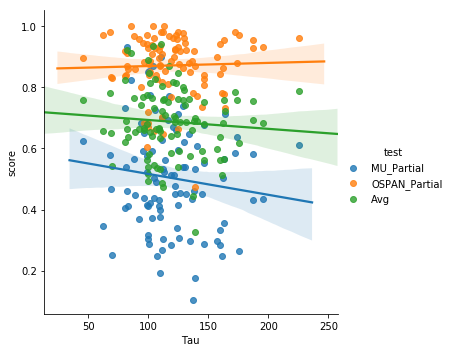

In [91]:
sns.lmplot(x="Tau", y="score", hue="test", data= aes_long_part_df)

In [89]:
aes_long_part_df.to_csv("Aes_Long_Part.csv")

In [44]:
from statsmodels.graphics.gofplots import qqplot_2samples
import statsmodels.api as sm
import matplotlib.pyplot as plt

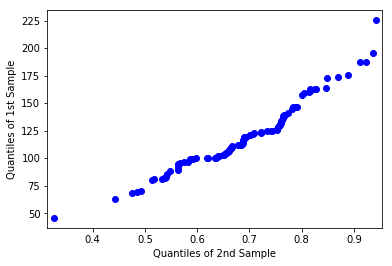

In [71]:
x = sm.ProbPlot(aes_log_df["Tau"])
y = sm.ProbPlot(aes_log_df["Avg"])
qqplot_2samples(x,y)
plt.show()

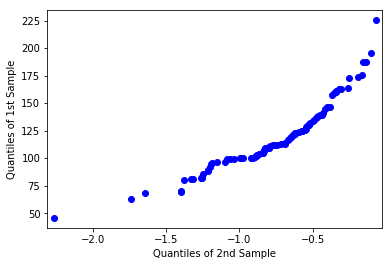

In [72]:
a = sm.ProbPlot(aes_log_df["Tau"])
b = sm.ProbPlot(aes_log_df["MU_log"])
qqplot_2samples(a,b)
plt.show()

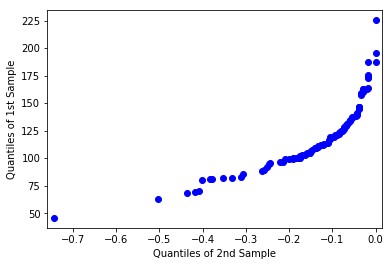

In [73]:
a = sm.ProbPlot(aes_log_df["Tau"])
b = sm.ProbPlot(aes_log_df["OSPAN_log"])
qqplot_2samples(a,b)
plt.show()

## Models (Aesthetic {Raw Partial and Zscore} and QMPE Version)

In [64]:
aes_tau_OSpart = smf.mixedlm("Tau ~ OSPAN_Partial", aes_part_df, groups=aes_part_df["subject"], method = "cg")
aes_tau_OSpart_f = aes_tau_OSpart.fit()
print(aes_tau_OSpart_f.summary())

NameError: name 'aes_part_df' is not defined

In [93]:
aes_tau_MUpart = smf.mixedlm("Tau ~ MU_Partial", aes_part_df, groups=aes_part_df["subject"])
aes_tau_MUpart_f = aes_tau_MUpart.fit()
print(aes_tau_MUpart_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              476.4707 
Min. group size:   1       Likelihood:         -468.3123
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  130.238    1.764 73.813 0.000 126.780 133.696
MU_Partial -21.453    2.623 -8.179 0.000 -26.593 -16.312
Group Var  476.471                                      



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [94]:
aes_tau_OMpart = smf.mixedlm("Tau ~ OSPAN_Partial + MU_Partial", aes_part_df, groups=aes_part_df["subject"])
aes_tau_OMpart_f = aes_tau_OMpart.fit()
print(aes_tau_OMpart_f.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Tau      
No. Observations:   98       Method:              REML     
No. Groups:         98       Scale:               478.6236 
Min. group size:    1        Likelihood:          -463.6001
Max. group size:    1        Converged:           Yes      
Mean group size:    1.0                                    
-----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     110.659    3.445 32.118 0.000 103.906 117.412
OSPAN_Partial  25.204   14.922  1.689 0.091  -4.042  54.450
MU_Partial    -26.218   18.922 -1.386 0.166 -63.305  10.868
Group Var     478.624                                      



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [95]:
aes_tau_avg = smf.mixedlm("Tau ~ Avg", aes_part_df, groups=aes_part_df["subject"])
aes_tau_avg_f = aes_tau_avg.fit()
print(aes_tau_avg_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              480.5626 
Min. group size:   1       Likelihood:         -468.2957
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 134.160    1.163 115.403 0.000 131.881 136.438
Avg       -21.406    2.839  -7.539 0.000 -26.971 -15.841
Group Var 480.563                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Models for Aesthetic Task- Version with Partial Scoring and Zscoring

In [34]:
aes_tau_Zospan = smf.mixedlm("Tau ~ OSPAN", aes_zscore_df, groups=aes_zscore_df["subject"])
aes_tau_Zospan_f = aes_tau_Zospan.fit()
print(aes_tau_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              483.0783 
Min. group size:   1       Likelihood:         -470.7227
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 119.439    0.231 517.288 0.000 118.986 119.891
OSPAN       0.985    3.131   0.314 0.753  -5.153   7.122
Group Var 483.078                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [35]:
aes_tau_Zmu = smf.mixedlm("Tau ~ MU", aes_zscore_df, groups=aes_zscore_df["subject"])
aes_tau_Zmu_f = aes_tau_Zmu.fit()
print(aes_tau_Zmu_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              476.4707 
Min. group size:   1       Likelihood:         -470.0616
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 119.439    0.146 816.444 0.000 119.152 119.726
MU         -3.730    3.115  -1.198 0.231  -9.835   2.375
Group Var 476.471                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [36]:
aes_tau_Zrapm = smf.mixedlm("Tau ~ RAPM", aes_zscore_df, groups=aes_zscore_df["subject"])
aes_tau_Zrapm_f = aes_tau_Zrapm.fit()
print(aes_tau_Zrapm_f.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Tau      
No. Observations:   98      Method:             REML     
No. Groups:         98      Scale:              482.8623 
Min. group size:    1       Likelihood:         -470.7012
Max. group size:    1       Converged:          Yes      
Mean group size:    1.0                                  
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept 119.439    0.112 1066.023 0.000 119.219 119.658
RAPM       -1.180    3.137   -0.376 0.707  -7.329   4.969
Group Var 482.862                                        



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


## Models for Aesthetic Task Final Vers (QMPE, Zscored IDs, SCamp)

In [69]:
aes_mu_Zospan = smf.mixedlm("Mu ~ OSPAN", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_mu_Zospan_f = aes_mu_Zospan.fit()
print(aes_mu_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Mu       
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              201.0732 
Min. group size:   1       Likelihood:         -428.6502
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 164.324    0.176 935.527 0.000 163.980 164.668
OSPAN      -1.894    2.018  -0.939 0.348  -5.850   2.061
Group Var 201.073                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [29]:
aes_mu_Zmu = smf.mixedlm("Mu ~ Mem_Update", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_mu_Zmu_f = aes_mu_Zmu.fit()
print(aes_mu_Zmu_f.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Mu       
No. Observations:  98       Method:              REML     
No. Groups:        98       Scale:               202.5222 
Min. group size:   1        Likelihood:          -428.9949
Max. group size:   1        Converged:           Yes      
Mean group size:   1.0                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  164.324    0.101 1632.035 0.000 164.126 164.521
Mem_Update   0.865    2.031    0.426 0.670  -3.114   4.845
Group Var  202.522                                        



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [30]:
aes_mu_Zrapm = smf.mixedlm("Mu ~ RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_mu_Zrapm_f = aes_mu_Zrapm.fit()
print(aes_mu_Zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Mu       
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              201.3984 
Min. group size:   1       Likelihood:         -428.7278
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 164.324    0.809 203.180 0.000 162.739 165.909
RAPM        1.718    1.859   0.924 0.355  -1.926   5.361
Group Var 201.398                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [31]:
aes_sig_Zospan = smf.mixedlm("Sigma ~ OSPAN", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_sig_Zospan_f = aes_sig_Zospan.fit()
print(aes_sig_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              84.0314  
Min. group size:  1       Likelihood:         -386.7713
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   49.130    0.066 748.081 0.000 49.001 49.259
OSPAN       -1.053    1.308  -0.805 0.421 -3.617  1.510
Group Var   84.031                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [32]:
aes_sig_Zmu = smf.mixedlm("Sigma ~ Mem_Update", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_sig_Zmu_f = aes_sig_Zmu.fit()
print(aes_sig_Zmu_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              83.6823  
Min. group size:  1       Likelihood:         -386.5714
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   49.130    0.059 833.984 0.000 49.015 49.245
Mem_Update  -1.339    1.306  -1.026 0.305 -3.898  1.220
Group Var   83.682                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [33]:
aes_sig_Zrapm = smf.mixedlm("Sigma ~ RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_sig_Zrapm_f = aes_sig_Zrapm.fit()
print(aes_sig_Zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              83.7083  
Min. group size:  1       Likelihood:         -386.5863
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   49.130    0.067 731.267 0.000 48.998 49.262
RAPM        -1.320    1.305  -1.011 0.312 -3.878  1.238
Group Var   83.708                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [34]:
aes_scamp_Zospan = smf.mixedlm("SCamp ~ OSPAN", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_scamp_Zospan_f = aes_scamp_Zospan.fit()
print(aes_scamp_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.2734   
Min. group size:  1       Likelihood:         -111.8346
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef. Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.640    0.028 166.001 0.000  4.586  4.695
OSPAN        0.047    0.069   0.674 0.500 -0.089  0.182
Group Var    0.273                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [35]:
aes_scamp_Zmu = smf.mixedlm("SCamp ~ Mem_Update", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_scamp_Zmu_f = aes_scamp_Zmu.fit()
print(aes_scamp_Zmu_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.2740   
Min. group size:  1       Likelihood:         -111.9332
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.640    0.007 693.196 0.000  4.627  4.654
Mem_Update  -0.033    0.074  -0.441 0.659 -0.179  0.113
Group Var    0.274                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [36]:
aes_scamp_Zrapm = smf.mixedlm("SCamp ~ RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_scamp_Zrapm_f = aes_scamp_Zrapm.fit()
print(aes_scamp_Zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.2729   
Min. group size:  1       Likelihood:         -111.7321
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef. Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.640    0.040 115.854 0.000  4.562  4.719
RAPM         0.058    0.063   0.915 0.360 -0.066  0.181
Group Var    0.273                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [73]:
aes_mu_Zcomb = smf.mixedlm("Mu ~ Mem_Update + OSPAN + RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_mu_Zcomb_f = aes_mu_Zcomb.fit()
print(aes_mu_Zcomb_f.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Mu       
No. Observations:   98      Method:             REML     
No. Groups:         98      Scale:              202.4702 
Min. group size:    1       Likelihood:         -424.6267
Max. group size:    1       Converged:          Yes      
Mean group size:    1.0                                  
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  164.324    0.682 240.824 0.000 162.986 165.661
Mem_Update   1.242    2.212   0.562 0.574  -3.093   5.577
OSPAN       -2.603    2.162  -1.204 0.229  -6.840   1.634
RAPM         1.810    1.999   0.905 0.365  -2.108   5.729
Group Var  202.470                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [74]:
aes_sig_Zcomb = smf.mixedlm("Sigma ~ Mem_Update + OSPAN + RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_sig_Zcomb_f = aes_sig_Zcomb.fit()
print(aes_sig_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              84.7783  
Min. group size:  1       Likelihood:         -383.7107
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   49.130    0.149 329.647 0.000 48.838 49.422
Mem_Update  -0.874    1.431  -0.611 0.541 -3.679  1.930
OSPAN       -0.602    1.399  -0.430 0.667 -3.344  2.141
RAPM        -0.986    1.366  -0.722 0.470 -3.663  1.690
Group Var   84.778                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [75]:
aes_tau_Zcomb = smf.mixedlm("Tau ~ Mem_Update + OSPAN + RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_tau_Zcomb_f = aes_tau_Zcomb.fit()
print(aes_tau_Zcomb_f.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Tau      
No. Observations:   98      Method:             REML     
No. Groups:         98      Scale:              483.6406 
Min. group size:    1       Likelihood:         -465.5519
Max. group size:    1       Converged:          Yes      
Mean group size:    1.0                                  
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  119.439    0.397 300.485 0.000 118.660 120.218
Mem_Update  -4.464    3.408  -1.310 0.190 -11.143   2.216
OSPAN        2.530    3.322   0.762 0.446  -3.981   9.042
RAPM        -0.394    3.271  -0.121 0.904  -6.806   6.017
Group Var  483.641                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [76]:
aes_scamp_Zcomb = smf.mixedlm("SCamp ~ Mem_Update + OSPAN + RAPM", aes_final_model_df, groups=aes_final_model_df["subject"])
aes_scamp_Zcomb_f = aes_scamp_Zcomb.fit()
print(aes_scamp_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.2757   
Min. group size:  1       Likelihood:         -114.4799
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     4.640    0.049 94.257 0.000  4.544  4.737
Mem_Update   -0.070    0.082 -0.862 0.389 -0.231  0.090
OSPAN         0.059    0.067  0.888 0.375 -0.071  0.190
RAPM          0.067    0.072  0.932 0.351 -0.074  0.208
Group Var     0.276                                    



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [38]:
aes_test = aes_zscore_df[["subject", "MU", "OSPAN", "RAPM"]]
aes_test

,subject,MU,OSPAN,RAPM
0,1,-0.081524,-0.322953,1.342009
1,2,0.955907,0.918399,-0.620930
2,3,1.130691,0.363323,0.949421
3,4,0.465382,1.120244,-0.228342
4,5,0.899524,1.009229,1.734597
5,6,0.420277,1.009229,-1.406105
6,7,-1.372674,1.009229,-1.013517
7,8,-0.763747,0.867937,0.949421
8,9,2.117378,1.291813,0.949421
9,10,0.048155,-1.049598,0.556834


In [39]:
tau_df = aes_zscore_df[["Tau"]]
tau_df = pd.concat([tau_df, tau_df, tau_df])
tau_df = tau_df.reset_index(drop = True)
tau_df

,Tau
0,106.724458
1,120.855988
2,111.727054
3,172.398595
4,123.166384
5,99.036833
6,175.320817
7,92.242802
8,103.864945
9,118.786518


In [40]:
#reshaping from wide to long
aes_long_zscore_df = pd.melt(aes_test, id_vars = ["subject"], var_name = "test", value_name = "score")
aes_long_zscore_df

,subject,test,score
0,1,MU,-0.081524
1,2,MU,0.955907
2,3,MU,1.130691
3,4,MU,0.465382
4,5,MU,0.899524
5,6,MU,0.420277
6,7,MU,-1.372674
7,8,MU,-0.763747
8,9,MU,2.117378
9,10,MU,0.048155


In [41]:
aes_long_zscore_df = pd.concat([aes_long_zscore_df, tau_df], axis =1)
aes_long_zscore_df

,subject,test,score,Tau
0,1,MU,-0.081524,106.724458
1,2,MU,0.955907,120.855988
2,3,MU,1.130691,111.727054
3,4,MU,0.465382,172.398595
4,5,MU,0.899524,123.166384
5,6,MU,0.420277,99.036833
6,7,MU,-1.372674,175.320817
7,8,MU,-0.763747,92.242802
8,9,MU,2.117378,103.864945
9,10,MU,0.048155,118.786518


In [42]:
aes_long_zscore_df.to_csv("Aes_Long_Zscore.csv")

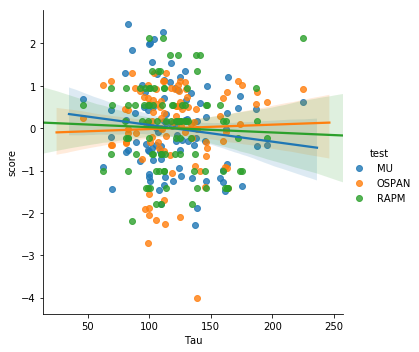

In [47]:
sns.lmplot(x="Tau", y="score", hue="test", data= aes_long_zscore_df)

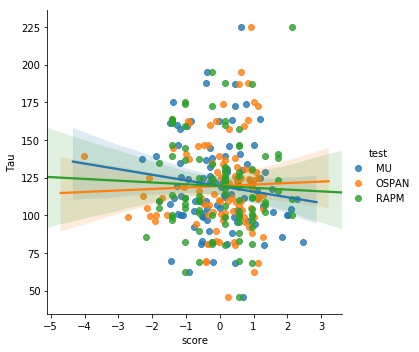

In [48]:
sns.lmplot(x="score", y="Tau", hue="test", data= aes_long_zscore_df)

## Reshaping Data for Models (Memorize {Raw Partial and Zscored} and QMPE Version)

In [37]:
qmpe_mem_df = pd.read_csv("QMPE_Mem_Gauss.csv", index_col = 0)
qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,270.0,4.0,1.0,7.0,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2.0,880.5,4.0,2.0,7.5,163.986945,57.422247,97.656617,7.200935,7.020489,9.496508,0.749242,-0.883277,-0.763476,-1417.394219,0.0,0.0,249.912500,61.392076
2,3,2.0,1039.5,4.0,1.0,8.5,124.041671,41.459446,102.457896,4.258141,5.278356,6.305341,0.603823,-0.779743,-0.600877,-1674.146638,0.0,0.0,211.487500,57.747388
3,4,2.0,647.0,4.0,2.0,7.5,208.590699,98.266527,150.668076,14.255714,12.149254,17.914000,0.761787,-0.893604,-0.774607,-1041.580007,0.0,0.0,344.650000,100.062948
4,5,2.0,704.5,4.0,2.0,9.5,149.215281,64.349666,112.829027,8.751575,7.875713,11.461180,0.716932,-0.863321,-0.723448,-1134.289900,0.0,0.0,248.937500,70.423406
5,6,2.0,923.0,4.0,1.0,9.5,138.600175,32.874102,111.234232,4.218892,7.911767,6.876560,0.632738,-0.758871,-0.624115,-1486.184338,0.0,0.0,232.224998,60.089587
6,7,2.0,636.5,4.0,1.0,11.0,132.957235,28.387115,165.884528,5.263671,16.739172,9.659769,0.150162,-0.584529,-0.307984,-1026.053486,0.0,0.0,270.287500,89.731932
7,8,2.0,643.5,4.0,2.0,9.5,183.588432,54.434098,96.223102,8.377360,8.748979,11.217377,0.753232,-0.882382,-0.769475,-1037.558247,0.0,0.0,267.787500,59.363022
8,9,2.0,811.0,4.0,1.0,7.5,188.511885,59.701668,115.347758,7.892521,8.920087,10.790846,0.745747,-0.870818,-0.755567,-1306.010554,0.0,0.0,288.912500,69.262077
9,10,2.0,975.5,4.0,1.0,10.0,129.667358,26.885107,119.374268,3.508122,9.601217,6.404258,0.570306,-0.703901,-0.573847,-1570.068375,0.0,0.0,229.225000,63.031803


In [38]:
qmpe_mem_df = qmpe_mem_df.drop(qmpe_mem_df[qmpe_mem_df["0"]== 85].index)
qmpe_mem_df = qmpe_mem_df.reset_index(drop = True)
qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,270.0,4.0,1.0,7.0,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2.0,880.5,4.0,2.0,7.5,163.986945,57.422247,97.656617,7.200935,7.020489,9.496508,0.749242,-0.883277,-0.763476,-1417.394219,0.0,0.0,249.912500,61.392076
2,3,2.0,1039.5,4.0,1.0,8.5,124.041671,41.459446,102.457896,4.258141,5.278356,6.305341,0.603823,-0.779743,-0.600877,-1674.146638,0.0,0.0,211.487500,57.747388
3,4,2.0,647.0,4.0,2.0,7.5,208.590699,98.266527,150.668076,14.255714,12.149254,17.914000,0.761787,-0.893604,-0.774607,-1041.580007,0.0,0.0,344.650000,100.062948
4,5,2.0,704.5,4.0,2.0,9.5,149.215281,64.349666,112.829027,8.751575,7.875713,11.461180,0.716932,-0.863321,-0.723448,-1134.289900,0.0,0.0,248.937500,70.423406
5,6,2.0,923.0,4.0,1.0,9.5,138.600175,32.874102,111.234232,4.218892,7.911767,6.876560,0.632738,-0.758871,-0.624115,-1486.184338,0.0,0.0,232.224998,60.089587
6,7,2.0,636.5,4.0,1.0,11.0,132.957235,28.387115,165.884528,5.263671,16.739172,9.659769,0.150162,-0.584529,-0.307984,-1026.053486,0.0,0.0,270.287500,89.731932
7,8,2.0,643.5,4.0,2.0,9.5,183.588432,54.434098,96.223102,8.377360,8.748979,11.217377,0.753232,-0.882382,-0.769475,-1037.558247,0.0,0.0,267.787500,59.363022
8,9,2.0,811.0,4.0,1.0,7.5,188.511885,59.701668,115.347758,7.892521,8.920087,10.790846,0.745747,-0.870818,-0.755567,-1306.010554,0.0,0.0,288.912500,69.262077
9,10,2.0,975.5,4.0,1.0,10.0,129.667358,26.885107,119.374268,3.508122,9.601217,6.404258,0.570306,-0.703901,-0.573847,-1570.068375,0.0,0.0,229.225000,63.031803


In [19]:
qmpe_mem_tau = qmpe_mem_df[["8"]]

In [20]:
mem_part_df = pd.concat([sub_df,part_df, qmpe_mem_tau], axis = 1)
mem_part_df =mem_part_df.rename(columns = {"8": "Tau"})
mem_part_df

,subject,MU_Partial,OSPAN_Partial,Avg,Tau
0,1,0.489216,0.840,0.664608,102.721089
1,2,0.669608,0.963,0.816304,97.656617
2,3,0.700000,0.908,0.804000,102.457896
3,4,0.584314,0.983,0.783657,150.668076
4,5,0.659804,0.972,0.815902,112.829027
5,6,0.576471,0.972,0.774235,111.234232
6,7,0.264706,0.972,0.618353,165.884528
7,8,0.370588,0.958,0.664294,96.223102
8,9,0.871569,1.000,0.935784,115.347758
9,10,0.511765,0.768,0.639882,119.374268


In [21]:
mem_tau_OSpart = smf.mixedlm("Tau ~ OSPAN_Partial", mem_part_df, groups=mem_part_df["subject"])
mem_tau_OSpart_f = mem_tau_OSpart.fit()
print(mem_tau_OSpart_f.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Tau      
No. Observations:    98       Method:              REML     
No. Groups:          98       Scale:               589.9611 
Min. group size:     1        Likelihood:          -478.0051
Max. group size:     1        Converged:           Yes      
Mean group size:     1.0                                    
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     137.409    3.548  38.729 0.000 130.455 144.363
OSPAN_Partial  -8.704    0.090 -97.210 0.000  -8.879  -8.528
Group Var     589.961                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [22]:
mem_tau_MUpart = smf.mixedlm("Tau ~ MU_Partial", mem_part_df, groups=mem_part_df["subject"])
mem_tau_MUpart_f = mem_tau_MUpart.fit()
print(mem_tau_MUpart_f.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Tau      
No. Observations:   98      Method:             REML     
No. Groups:         98      Scale:              556.7730 
Min. group size:    1       Likelihood:         -475.7883
Max. group size:    1       Converged:          Yes      
Mean group size:    1.0                                  
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  153.296    5.309  28.875 0.000 142.891 163.702
MU_Partial -46.638    3.994 -11.678 0.000 -54.466 -38.810
Group Var  556.773                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [49]:
mem_zscore_df = pd.concat([sub_df,zscore_df, qmpe_mem_tau], axis = 1)
mem_zscore_df =mem_zscore_df.rename(columns = {"8": "Tau"})
mem_zscore_df

,subject,MU,OSPAN,RAPM,Tau
0,1,-0.081524,-0.322953,1.342009,102.721089
1,2,0.955907,0.918399,-0.620930,97.656617
2,3,1.130691,0.363323,0.949421,102.457896
3,4,0.465382,1.120244,-0.228342,150.668076
4,5,0.899524,1.009229,1.734597,112.829027
5,6,0.420277,1.009229,-1.406105,111.234232
6,7,-1.372674,1.009229,-1.013517,165.884528
7,8,-0.763747,0.867937,0.949421,96.223102
8,9,2.117378,1.291813,0.949421,115.347758
9,10,0.048155,-1.049598,0.556834,119.374268


In [50]:
mem_zscore_df.to_csv("Mem_ID_Zscore.csv")

## Shaping Data for Models (Memorize and All Parameters)

In [39]:
qmpe_mem_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2.0,270.0,4.0,1.0,7.0,139.883892,37.807063,102.721089,8.747904,13.430297,13.208958,0.699006,-0.812641,-0.690464,-434.742334,0.0,0.0,227.375001,56.713507
1,2,2.0,880.5,4.0,2.0,7.5,163.986945,57.422247,97.656617,7.200935,7.020489,9.496508,0.749242,-0.883277,-0.763476,-1417.394219,0.0,0.0,249.912500,61.392076
2,3,2.0,1039.5,4.0,1.0,8.5,124.041671,41.459446,102.457896,4.258141,5.278356,6.305341,0.603823,-0.779743,-0.600877,-1674.146638,0.0,0.0,211.487500,57.747388
3,4,2.0,647.0,4.0,2.0,7.5,208.590699,98.266527,150.668076,14.255714,12.149254,17.914000,0.761787,-0.893604,-0.774607,-1041.580007,0.0,0.0,344.650000,100.062948
4,5,2.0,704.5,4.0,2.0,9.5,149.215281,64.349666,112.829027,8.751575,7.875713,11.461180,0.716932,-0.863321,-0.723448,-1134.289900,0.0,0.0,248.937500,70.423406
5,6,2.0,923.0,4.0,1.0,9.5,138.600175,32.874102,111.234232,4.218892,7.911767,6.876560,0.632738,-0.758871,-0.624115,-1486.184338,0.0,0.0,232.224998,60.089587
6,7,2.0,636.5,4.0,1.0,11.0,132.957235,28.387115,165.884528,5.263671,16.739172,9.659769,0.150162,-0.584529,-0.307984,-1026.053486,0.0,0.0,270.287500,89.731932
7,8,2.0,643.5,4.0,2.0,9.5,183.588432,54.434098,96.223102,8.377360,8.748979,11.217377,0.753232,-0.882382,-0.769475,-1037.558247,0.0,0.0,267.787500,59.363022
8,9,2.0,811.0,4.0,1.0,7.5,188.511885,59.701668,115.347758,7.892521,8.920087,10.790846,0.745747,-0.870818,-0.755567,-1306.010554,0.0,0.0,288.912500,69.262077
9,10,2.0,975.5,4.0,1.0,10.0,129.667358,26.885107,119.374268,3.508122,9.601217,6.404258,0.570306,-0.703901,-0.573847,-1570.068375,0.0,0.0,229.225000,63.031803


In [40]:
mem_zscore_df = pd.read_csv("Mem_ID_Zscore.csv", index_col = 0)
mem_zscore_df

,subject,MU,OSPAN,RAPM,Tau
0,1,-0.081524,-0.322953,1.342009,102.721089
1,2,0.955907,0.918399,-0.620930,97.656617
2,3,1.130691,0.363323,0.949421,102.457896
3,4,0.465382,1.120244,-0.228342,150.668076
4,5,0.899524,1.009229,1.734597,112.829027
5,6,0.420277,1.009229,-1.406105,111.234232
6,7,-1.372674,1.009229,-1.013517,165.884528
7,8,-0.763747,0.867937,0.949421,96.223102
8,9,2.117378,1.291813,0.949421,115.347758
9,10,0.048155,-1.049598,0.556834,119.374268


In [41]:
qmpe_mem_mu = qmpe_mem_df[["6"]]
qmpe_mem_sig = qmpe_mem_df[["7"]]

In [51]:
mem_df = pd.read_csv("SM01_Retest_Memorize_Task.csv", index_col = 0)
mem_df

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
1972,1,target_arcade,memorize,41,676.0,451.0,121,9.06
1973,1,target_arcade,memorize,42,617.0,125.0,256,5.69
1971,1,target_arcade,memorize,40,659.0,739.0,142,7.71
1970,1,target_arcade,memorize,39,609.0,765.0,226,1.71
1968,1,target_arcade,memorize,37,342.0,539.0,216,3.23
1942,1,target_arcade,memorize,11,196.0,559.0,318,11.64
1943,1,target_arcade,memorize,12,478.0,904.0,172,2.12
1944,1,target_arcade,memorize,13,416.0,963.0,407,2.57
1945,1,target_arcade,memorize,14,308.0,989.0,682,9.45
1946,1,target_arcade,memorize,15,370.0,642.0,209,2.2


In [52]:
mem_scamp_df = mem_df[["subj", "SCamp"]]
mem_scamp_df["SCamp"] = pd.to_numeric(mem_scamp_df["SCamp"], errors="coerce")
mem_scamp_df = mem_scamp_df.groupby("subj").mean()
mem_scamp_df = mem_scamp_df.reset_index()
mem_scamp_df = mem_scamp_df.drop(mem_scamp_df[mem_scamp_df["subj"] == 86].index)
mem_scamp_df = mem_scamp_df.drop(mem_scamp_df[mem_scamp_df["subj"]== 80].index)
mem_scamp_df = mem_scamp_df.reset_index(drop = True)
mem_scamp_df = mem_scamp_df[["SCamp"]]
mem_scamp_df

/Users/zoeloh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SCamp
0,4.679519
1,4.817836
2,3.981049
3,4.165634
4,4.686260
5,4.123028
6,3.670511
7,3.653761
8,4.789211
9,2.826130


In [53]:
mem_final_model_df = pd.concat([mem_zscore_df, qmpe_mem_mu, qmpe_mem_sig, mem_scamp_df], axis =1)
mem_final_model_df = mem_final_model_df.rename(columns = {"6": "Mu", "7": "Sigma", "MU": "Mem_Update"})
mem_final_model_df

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp
0,1,-0.081524,-0.322953,1.342009,102.721089,139.883892,37.807063,4.679519
1,2,0.955907,0.918399,-0.620930,97.656617,163.986945,57.422247,4.817836
2,3,1.130691,0.363323,0.949421,102.457896,124.041671,41.459446,3.981049
3,4,0.465382,1.120244,-0.228342,150.668076,208.590699,98.266527,4.165634
4,5,0.899524,1.009229,1.734597,112.829027,149.215281,64.349666,4.686260
5,6,0.420277,1.009229,-1.406105,111.234232,138.600175,32.874102,4.123028
6,7,-1.372674,1.009229,-1.013517,165.884528,132.957235,28.387115,3.670511
7,8,-0.763747,0.867937,0.949421,96.223102,183.588432,54.434098,3.653761
8,9,2.117378,1.291813,0.949421,115.347758,188.511885,59.701668,4.789211
9,10,0.048155,-1.049598,0.556834,119.374268,129.667358,26.885107,2.826130


In [54]:
mem_final_model_df.to_csv("Mem_Zscore_Final.csv")

## Models for Memorize Task Final Vers (QMPE, Zscore, SCamp)

In [52]:
mem_tau_zospan = smf.mixedlm("Tau ~ OSPAN", mem_zscore_df, groups=mem_zscore_df["subject"])
mem_tau_zospan_f = mem_tau_zospan.fit()
print(mem_tau_zospan_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              589.9611 
Min. group size:   1       Likelihood:         -480.3169
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 129.819    0.477 272.379 0.000 128.885 130.753
OSPAN      -0.862    3.437  -0.251 0.802  -7.599   5.874
Group Var 589.961                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [53]:
mem_tau_zmu = smf.mixedlm("Tau ~ MU", mem_zscore_df, groups=mem_zscore_df["subject"])
mem_tau_zmu_f = mem_tau_zmu.fit()
print(mem_tau_zmu_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              556.7730 
Min. group size:   1       Likelihood:         -477.5377
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 129.819    0.341 380.429 0.000 129.150 130.488
MU         -8.110    3.354  -2.418 0.016 -14.682  -1.537
Group Var 556.773                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [54]:
mem_tau_zrapm = smf.mixedlm("Tau ~ RAPM", mem_zscore_df, groups=mem_zscore_df["subject"])
mem_tau_zrapm_f = mem_tau_zrapm.fit()
print(mem_tau_zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              588.8182 
Min. group size:   1       Likelihood:         -480.2238
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 129.819    0.894 145.229 0.000 128.067 131.571
RAPM       -1.727    3.349  -0.516 0.606  -8.292   4.837
Group Var 588.818                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [55]:
mem_mu_Zospan = smf.mixedlm("Mu ~ OSPAN", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_mu_Zospan_f = mem_mu_Zospan.fit()
print(mem_mu_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Mu       
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              221.5528 
Min. group size:   1       Likelihood:         -433.3058
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 156.310    0.194 804.062 0.000 155.929 156.691
OSPAN      -0.481    2.117  -0.227 0.820  -4.631   3.669
Group Var 221.553                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [56]:
mem_mu_Zmu = smf.mixedlm("Mu ~ Mem_Update", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_mu_Zmu_f = mem_mu_Zmu.fit()
print(mem_mu_Zmu_f.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Mu       
No. Observations:  98       Method:              REML     
No. Groups:        98       Scale:               220.9647 
Min. group size:   1        Likelihood:          -433.1783
Max. group size:   1        Converged:           Yes      
Mean group size:   1.0                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  156.310    0.032 4855.087 0.000 156.247 156.373
Mem_Update   1.176    2.123    0.554 0.580  -2.985   5.338
Group Var  220.965                                        



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [57]:
mem_mu_Zrapm = smf.mixedlm("Mu ~ RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_mu_Zrapm_f = mem_mu_Zrapm.fit()
print(mem_mu_Zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Mu       
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              220.9486 
Min. group size:   1       Likelihood:         -433.1748
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept 156.310    0.315 495.763 0.000 155.692 156.928
RAPM        1.190    2.100   0.566 0.571  -2.926   5.305
Group Var 220.949                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [58]:
mem_sig_Zospan = smf.mixedlm("Sigma ~ OSPAN", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_sig_Zospan_f = mem_sig_Zospan.fit()
print(mem_sig_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              131.6170 
Min. group size:  1       Likelihood:         -408.3091
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    47.654    1.307 36.451 0.000 45.092 50.216
OSPAN        -2.321    0.988 -2.348 0.019 -4.258 -0.383
Group Var   131.617                                    



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [59]:
mem_sig_Zmu = smf.mixedlm("Sigma ~ Mem_Update", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_sig_Zmu_f = mem_sig_Zmu.fit()
print(mem_sig_Zmu_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              134.3558 
Min. group size:  1       Likelihood:         -409.2977
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   47.654    0.172 276.652 0.000 47.316 47.992
Mem_Update   0.140    1.647   0.085 0.932 -3.088  3.368
Group Var  134.356                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [60]:
mem_sig_Zrapm = smf.mixedlm("Sigma ~ RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_sig_Zrapm_f = mem_sig_Zrapm.fit()
print(mem_sig_Zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              134.2736 
Min. group size:  1       Likelihood:         -409.2684
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    47.654    0.653 72.935 0.000 46.373 48.935
RAPM          0.425    1.521  0.279 0.780 -2.556  3.406
Group Var   134.274                                    



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [61]:
mem_scamp_Zospan = smf.mixedlm("SCamp ~ OSPAN", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_scamp_Zospan_f = mem_scamp_Zospan.fit()
print(mem_scamp_Zospan_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.3004   
Min. group size:  1       Likelihood:         -116.3395
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef. Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.494    0.006 741.958 0.000  4.482  4.506
OSPAN        0.025    0.078   0.327 0.744 -0.127  0.178
Group Var    0.300                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [62]:
mem_scamp_Zmu = smf.mixedlm("SCamp ~ Mem_Update", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_scamp_Zmu_f = mem_scamp_Zmu.fit()
print(mem_scamp_Zmu_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.2983   
Min. group size:  1       Likelihood:         -116.0087
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.494    0.006 803.442 0.000  4.483  4.505
Mem_Update  -0.068    0.078  -0.880 0.379 -0.221  0.084
Group Var    0.298                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [63]:
mem_scamp_Zrapm = smf.mixedlm("SCamp ~ RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_scamp_Zrapm_f = mem_scamp_Zrapm.fit()
print(mem_scamp_Zrapm_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.2999   
Min. group size:  1       Likelihood:         -116.2719
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef. Std.Err.    z     P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   4.494    0.002 1935.709 0.000  4.489  4.499
RAPM        0.038    0.078    0.492 0.623 -0.115  0.192
Group Var   0.300                                      



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [77]:
mem_mu_Zcomb = smf.mixedlm("Mu ~ Mem_Update + OSPAN + RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_mu_Zcomb_f = mem_mu_Zcomb.fit()
print(mem_mu_Zcomb_f.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Mu       
No. Observations:   98      Method:             REML     
No. Groups:         98      Scale:              224.7148 
Min. group size:    1       Likelihood:         -429.5259
Max. group size:    1       Converged:          Yes      
Mean group size:    1.0                                  
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  156.310    0.233 671.628 0.000 155.854 156.766
Mem_Update   1.254    2.331   0.538 0.591  -3.316   5.823
OSPAN       -1.065    2.278  -0.468 0.640  -5.529   3.399
RAPM         1.027    2.218   0.463 0.643  -3.321   5.375
Group Var  224.715                                       



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [78]:
mem_sig_Zcomb = smf.mixedlm("Sigma ~ Mem_Update + OSPAN + RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_sig_Zcomb_f = mem_sig_Zcomb.fit()
print(mem_sig_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              133.7378 
Min. group size:  1       Likelihood:         -405.1352
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    47.654    1.426 33.421 0.000 44.859 50.449
Mem_Update    0.870    1.681  0.517 0.605 -2.426  4.165
OSPAN        -2.713    1.461 -1.857 0.063 -5.577  0.150
RAPM          0.636    1.445  0.440 0.660 -2.197  3.468
Group Var   133.738                                    



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [79]:
mem_tau_Zcomb = smf.mixedlm("Tau ~ Mem_Update + OSPAN + RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_tau_Zcomb_f = mem_tau_Zcomb.fit()
print(mem_tau_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  98      Method:             REML     
No. Groups:        98      Scale:              566.6097 
Min. group size:   1       Likelihood:         -472.9934
Max. group size:   1       Converged:          Yes      
Mean group size:   1.0                                  
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  129.819    1.300 99.853 0.000 127.271 132.367
Mem_Update  -8.870    3.683 -2.409 0.016 -16.088  -1.652
OSPAN        2.027    3.609  0.562 0.574  -5.046   9.100
RAPM         0.326    3.278  0.099 0.921  -6.100   6.751
Group Var  566.610                                      



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [80]:
mem_scamp_Zcomb = smf.mixedlm("SCamp ~ Mem_Update + OSPAN + RAPM", mem_final_model_df, groups=mem_final_model_df["subject"])
mem_scamp_Zcomb_f = mem_scamp_Zcomb.fit()
print(mem_scamp_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 98      Method:             REML     
No. Groups:       98      Scale:              0.3017   
Min. group size:  1       Likelihood:         -118.7067
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    4.494    0.008 579.697 0.000  4.479  4.509
Mem_Update  -0.100    0.085  -1.174 0.241 -0.268  0.067
OSPAN        0.049    0.083   0.593 0.553 -0.114  0.213
RAPM         0.057    0.082   0.703 0.482 -0.102  0.217
Group Var    0.302                                     



/Users/zoeloh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


## Means for Raw and SCamp

Dropping the two subjects with issues from the two task dfs. Grouping by subject to find participant averages and then finding the mean and standard deviations for the raw fixation durations and saccade amplitude.

In [30]:
aes_raw = pd.read_csv("SM01_Retest_Aesthetic_Task.csv", index_col = 0)
aes_raw

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
2599,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
2646,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2540,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
2489,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
2853,1,target_desktop,aesthetic,31,415.0,839.0,464,2.80
...,...,...,...,...,...,...,...,...
340082,100,target_train,aesthetic,34,439.0,868.0,333,1.10
340081,100,target_train,aesthetic,33,509.0,822.0,292,2.07
340080,100,target_train,aesthetic,32,453.0,855.0,305,1.61
340090,100,target_tunnel,aesthetic,6,232.0,807.0,218,5.07


In [32]:
aes_raw = aes_raw.drop(aes_raw[aes_raw["subj"] == 86].index)
aes_raw = aes_raw.drop(aes_raw[aes_raw["subj"]== 80].index)
aes_raw = aes_raw.reset_index(drop = True)
aes_raw

,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
0,1,target_closet,aesthetic,13,387.0,113.0,175,2.17
1,1,target_coffeeshop,aesthetic,18,381.0,647.0,291,1.39
2,1,target_cemetery,aesthetic,31,304.0,462.0,165,6.58
3,1,target_busstop,aesthetic,19,146.0,312.0,122,9.07
4,1,target_desktop,aesthetic,31,415.0,839.0,464,2.80
...,...,...,...,...,...,...,...,...
154532,100,target_train,aesthetic,34,439.0,868.0,333,1.10
154533,100,target_train,aesthetic,33,509.0,822.0,292,2.07
154534,100,target_train,aesthetic,32,453.0,855.0,305,1.61
154535,100,target_tunnel,aesthetic,6,232.0,807.0,218,5.07


In [33]:
aes_raw.subj.nunique()

98

In [35]:
aes_raw.durs.mean()

285.27869054012956

In [36]:
aes_raw.durs.std()

150.89030867601375

In [41]:
aes_means = aes_raw[["subj", "durs", "SCamp"]]
aes_means.head()

,subj,durs,SCamp
0,1,175,2.17
1,1,291,1.39
2,1,165,6.58
3,1,122,9.07
4,1,464,2.80


In [42]:
aes_means = aes_means.groupby("subj").mean()
aes_means

,durs,SCamp
subj,,
1,269.770531,4.607705
2,278.331465,4.350217
3,264.361930,4.196172
4,384.241002,4.622512
5,279.503582,5.075996
...,...,...
96,257.882353,5.177854
97,303.122861,5.360244
98,326.069065,6.095942


In [43]:
print(aes_means.durs.mean())
print(aes_means.durs.std())

289.2959278394842
33.63684053600447


In [44]:
print(aes_means.SCamp.mean())
print(aes_means.SCamp.std())

4.6404232075216285
0.7371919698946512


In [47]:
mem_raw = pd.read_csv("SM01_Retest_Memorize_Task.csv", index_col = 0)
mem_raw

/Users/zoeloh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,subj,image,task,fixN,locs_1,locs_2,durs,SCamp
1972,1,target_arcade,memorize,41,676.0,451.0,121,9.06
1973,1,target_arcade,memorize,42,617.0,125.0,256,5.69
1971,1,target_arcade,memorize,40,659.0,739.0,142,7.71
1970,1,target_arcade,memorize,39,609.0,765.0,226,1.71
1968,1,target_arcade,memorize,37,342.0,539.0,216,3.23
...,...,...,...,...,...,...,...,...
340599,100,target_clothingstore,memorize,33,166.0,378.0,648,2.24
340598,100,target_clothingstore,memorize,32,169.0,202.0,417,5.19
340597,100,target_clothingstore,memorize,31,65.0,813.0,344,18.04
340596,100,target_clothingstore,memorize,30,78.0,849.0,262,0.95


In [48]:
mem_raw["SCamp"] = pd.to_numeric(mem_raw["SCamp"], errors="coerce")
mem_raw = mem_raw.drop(mem_raw[mem_raw["subj"] == 86].index)
mem_raw = mem_raw.drop(mem_raw[mem_raw["subj"]== 80].index)
mem_raw = mem_raw.reset_index(drop = True)

In [51]:
mem_raw.subj.nunique()

98

In [52]:
mem_means = mem_raw[["subj", "durs", "SCamp"]]
mem_means.head()

,subj,durs,SCamp
0,1,121,9.06
1,1,256,5.69
2,1,142,7.71
3,1,226,1.71
4,1,216,3.23


In [53]:
mem_means = mem_means.groupby("subj").mean()
mem_means

,durs,SCamp
subj,,
1,251.455556,4.679519
2,264.950028,4.817836
3,227.677730,3.981049
4,368.198609,4.165634
5,263.948900,4.686260
...,...,...
96,293.018248,5.315152
97,279.441573,5.367663
98,276.161804,5.470351


In [54]:
print(mem_means.durs.mean())
print(mem_means.durs.std())

291.88534906452884
35.72353951383498


## Shaping for Combined Task Models

In [55]:
print(mem_means.SCamp.mean())
print(mem_means.SCamp.std())

4.493998392104585
0.7714695271736608


In [94]:
aesthetic_task = (["Aesthetic"] *98)
aes_final_model_df["Task"] = aesthetic_task

In [95]:
aes_final_model_df.head()

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp,Task
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705,Aesthetic
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217,Aesthetic
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172,Aesthetic
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512,Aesthetic
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996,Aesthetic


In [91]:
memorize_task = ["Memorize"] *98
mem_final_model_df["Task"] = memorize_task

In [92]:
mem_final_model_df.head()

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp,Task
0,1,-0.081524,-0.322953,1.342009,102.721089,139.883892,37.807063,4.679519,Memorize
1,2,0.955907,0.918399,-0.620930,97.656617,163.986945,57.422247,4.817836,Memorize
2,3,1.130691,0.363323,0.949421,102.457896,124.041671,41.459446,3.981049,Memorize
3,4,0.465382,1.120244,-0.228342,150.668076,208.590699,98.266527,4.165634,Memorize
4,5,0.899524,1.009229,1.734597,112.829027,149.215281,64.349666,4.686260,Memorize


In [99]:
both_final_model_df = pd.concat ([aes_final_model_df, mem_final_model_df])
both_final_model_df = both_final_model_df.reset_index(drop = True)
both_final_model_df

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp,Task
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705,Aesthetic
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217,Aesthetic
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172,Aesthetic
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512,Aesthetic
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996,Aesthetic
5,6,0.420277,1.009229,-1.406105,99.036833,142.774136,34.428104,4.744921,Aesthetic
6,7,-1.372674,1.009229,-1.013517,175.320817,150.662466,37.365567,3.687005,Aesthetic
7,8,-0.763747,0.867937,0.949421,92.242802,192.837692,57.111976,4.215256,Aesthetic
8,9,2.117378,1.291813,0.949421,103.864945,190.251821,55.178194,5.270961,Aesthetic
9,10,0.048155,-1.049598,0.556834,118.786518,139.051999,25.429333,2.570770,Aesthetic


In [100]:
both_final_model_df.to_csv("Task_Zscore_Final.csv")

## Combined Task Models (Zscore, QMPE, SCamp)

In [41]:
both_final_model_df = pd.read_csv("Task_Zscore_Final.csv")

In [101]:
both_mu_Zcomb = smf.mixedlm("Mu ~ Mem_Update + OSPAN + RAPM", both_final_model_df, groups=both_final_model_df["subject"])
both_mu_Zcomb_f = both_mu_Zcomb.fit()
print(both_mu_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Mu       
No. Observations:  196     Method:             REML     
No. Groups:        98      Scale:              136.2106 
Min. group size:   2       Likelihood:         -834.6559
Max. group size:   2       Converged:          Yes      
Mean group size:   2.0                                  
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  160.317    1.952 82.109 0.000 156.490 164.144
Mem_Update   1.248    2.127  0.587 0.557  -2.921   5.417
OSPAN       -1.834    2.077 -0.883 0.377  -5.904   2.236
RAPM         1.419    2.034  0.697 0.486  -2.568   5.405
Group Var  305.488    6.536                             



In [105]:
both_mu_Zcomb = smf.mixedlm("Mu ~ Mem_Update + OSPAN + RAPM + Task", both_final_model_df, groups=both_final_model_df["subject"])
both_mu_Zcomb_f = both_mu_Zcomb.fit()
print(both_mu_Zcomb_f.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Mu       
No. Observations:    196       Method:               REML     
No. Groups:          98        Scale:                105.1763 
Min. group size:     2         Likelihood:           -820.1853
Max. group size:     2         Converged:            Yes      
Mean group size:     2.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        164.324    2.085 78.798 0.000 160.237 168.411
Task[T.Memorize]  -8.013    1.465 -5.470 0.000 -10.885  -5.142
Mem_Update         1.248    2.127  0.587 0.557  -2.921   5.417
OSPAN             -1.834    2.077 -0.883 0.377  -5.904   2.236
RAPM               1.419    2.034  0.697 0.486  -2.568   5.405
Group Var        321.005    7.456                             



In [47]:
both_mu_Zcomb = smf.mixedlm("Mu ~ Mem_Update * OSPAN * RAPM * Task", both_final_model_df, groups=both_final_model_df["subject"])
both_mu_Zcomb_f = both_mu_Zcomb.fit()
print(both_mu_Zcomb_f.summary())
both_mu_Zcomb_f.aic

                       Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          Mu       
No. Observations:            196              Method:                      REML     
No. Groups:                  98               Scale:                       106.9082 
Min. group size:             2                Log-Likelihood:              -801.5720
Max. group size:             2                Converged:                   Yes      
Mean group size:             2.0                                                    
------------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------------------
Intercept                              164.672    2.248 73.247 0.000 160.266 169.079
Task[T.Memorize]                        -8.246    1.567 -5.264 0.000 -11.317  -5.176
Mem_

nan

In [48]:
# BIC = -2 * LogLikelihood + ln(N) * k
(-2 * -801.5720) + (np.log(196) * 18)

1698.1500638661494

In [123]:
mu_formula = "Mu ~ Mem_Update * OSPAN * RAPM * Task"

In [124]:
both_mu_Zcomb = smf.glm(formula = mu_formula, data = both_final_model_df)
both_mu_Zcomb_f = both_mu_Zcomb.fit()
print(both_mu_Zcomb_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     Mu   No. Observations:                  196
Model:                            GLM   Df Residuals:                      180
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                          440.40
Method:                          IRLS   Log-Likelihood:                -866.36
Date:                Fri, 26 Jun 2020   Deviance:                       79271.
Time:                        01:44:18   Pearson chi2:                 7.93e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                164.6723      2.248     73.246    

In [102]:
both_sig_Zcomb = smf.mixedlm("Sigma ~ Mem_Update + OSPAN + RAPM", both_final_model_df, groups=both_final_model_df["subject"])
both_sig_Zcomb_f = both_sig_Zcomb.fit()
print(both_sig_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sigma    
No. Observations: 196     Method:             REML     
No. Groups:       98      Scale:              71.3818  
Min. group size:  2       Likelihood:         -769.7017
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    48.392    1.370 35.319 0.000 45.707 51.077
Mem_Update   -0.002    1.493 -0.002 0.999 -2.928  2.923
OSPAN        -1.657    1.457 -1.137 0.255 -4.514  1.199
RAPM         -0.175    1.427 -0.123 0.902 -2.973  2.622
Group Var   148.288    4.446                           



In [106]:
both_sig_Zcomb = smf.mixedlm("Sigma ~ Mem_Update + OSPAN + RAPM + Task", both_final_model_df, groups=both_final_model_df["subject"])
both_sig_Zcomb_f = both_sig_Zcomb.fit()
print(both_sig_Zcomb_f.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Sigma    
No. Observations:    196      Method:              REML     
No. Groups:          98       Scale:               71.0172  
Min. group size:     2        Likelihood:          -767.8463
Max. group size:     2        Converged:           Yes      
Mean group size:     2.0                                    
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         49.130    1.497 32.829 0.000 46.197 52.063
Task[T.Memorize]  -1.476    1.204 -1.226 0.220 -3.836  0.884
Mem_Update        -0.002    1.493 -0.002 0.999 -2.928  2.923
OSPAN             -1.657    1.457 -1.137 0.255 -4.514  1.199
RAPM              -0.175    1.427 -0.123 0.902 -2.973  2.622
Group Var        148.470    4.468                           



In [118]:
both_sig_Zcomb = smf.mixedlm("Sigma ~ Mem_Update * OSPAN * RAPM * Task", both_final_model_df, groups=both_final_model_df["subject"])
both_sig_Zcomb_f = both_sig_Zcomb.fit()
print(both_sig_Zcomb_f.summary())

                      Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          Sigma    
No. Observations:          196              Method:                      REML     
No. Groups:                98               Scale:                       71.5133  
Min. group size:           2                Likelihood:                  -750.8797
Max. group size:           2                Converged:                   Yes      
Mean group size:           2.0                                                    
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                               48.283    1.601 30.162 0.000 45.145 51.420
Task[T.Memorize]                        -1.218    1.281 -0.951 0.342 -3.729  1.293
Mem_Update                 

In [119]:
sig_formula = "Sigma ~ Mem_Update * OSPAN * RAPM * Task"

In [121]:
both_sig_Zcomb = smf.glm(formula = sig_formula, data = both_final_model_df)
both_sig_Zcomb_f = both_sig_Zcomb.fit()
print(both_sig_Zcomb_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Sigma   No. Observations:                  196
Model:                            GLM   Df Residuals:                      180
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                          223.28
Method:                          IRLS   Log-Likelihood:                -799.79
Date:                Fri, 26 Jun 2020   Deviance:                       40190.
Time:                        01:40:48   Pearson chi2:                 4.02e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 48.2829      1.601     30.162    

In [103]:
both_tau_Zcomb = smf.mixedlm("Tau ~ Mem_Update + OSPAN + RAPM", both_final_model_df, groups=both_final_model_df["subject"])
both_tau_Zcomb_f = both_tau_Zcomb.fit()
print(both_tau_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Tau      
No. Observations:  196     Method:             REML     
No. Groups:        98      Scale:              286.0945 
Min. group size:   2       Likelihood:         -914.1048
Max. group size:   2       Converged:          Yes      
Mean group size:   2.0                                  
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  124.629    3.088 40.362 0.000 118.577 130.681
Mem_Update  -6.667    3.364 -1.982 0.047 -13.260  -0.074
OSPAN        2.279    3.284  0.694 0.488  -4.158   8.716
RAPM        -0.034    3.217 -0.011 0.991  -6.339   6.270
Group Var  791.321   11.279                             



In [107]:
both_tau_Zcomb = smf.mixedlm("Tau ~ Mem_Update + OSPAN + RAPM + Task", both_final_model_df, groups=both_final_model_df["subject"])
both_tau_Zcomb_f = both_tau_Zcomb.fit()
print(both_tau_Zcomb_f.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Tau      
No. Observations:    196       Method:               REML     
No. Groups:          98        Scale:                234.6129 
Min. group size:     2         Likelihood:           -902.1816
Max. group size:     2         Converged:            Yes      
Mean group size:     2.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        119.439    3.276 36.460 0.000 113.018 125.859
Task[T.Memorize]  10.380    2.188  4.744 0.000   6.092  14.669
Mem_Update        -6.667    3.364 -1.982 0.047 -13.260  -0.074
OSPAN              2.279    3.284  0.694 0.488  -4.158   8.716
RAPM              -0.034    3.217 -0.011 0.991  -6.339   6.270
Group Var        817.055   12.486                             



In [117]:
both_tau_Zcomb = smf.mixedlm("Tau ~ Mem_Update * OSPAN * RAPM * Task", both_final_model_df, groups=both_final_model_df["subject"])
both_tau_Zcomb_f = both_tau_Zcomb.fit()
print(both_tau_Zcomb_f.summary())

                       Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          Tau      
No. Observations:            196              Method:                      REML     
No. Groups:                  98               Scale:                       232.1551 
Min. group size:             2                Likelihood:                  -875.4447
Max. group size:             2                Converged:                   Yes      
Mean group size:             2.0                                                    
------------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------------------
Intercept                              119.229    3.448 34.575 0.000 112.470 125.988
Task[T.Memorize]                         9.504    2.308  4.117 0.000   4.979  14.028
Mem_

In [115]:
formula = "Tau ~ Mem_Update * OSPAN * RAPM * Task"

In [116]:
both_tau_Zcomb = smf.glm(formula = formula, data = both_final_model_df)
both_tau_Zcomb_f = both_tau_Zcomb.fit()
print(both_tau_Zcomb_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Tau   No. Observations:                  196
Model:                            GLM   Df Residuals:                      180
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                          1036.2
Method:                          IRLS   Log-Likelihood:                -950.21
Date:                Thu, 25 Jun 2020   Deviance:                   1.8651e+05
Time:                        15:32:00   Pearson chi2:                 1.87e+05
No. Iterations:                     3   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                119.2290      3.448     34.575    

In [104]:
both_scamp_Zcomb = smf.mixedlm("SCamp ~ Mem_Update + OSPAN + RAPM", both_final_model_df, groups=both_final_model_df["subject"])
both_scamp_Zcomb_f = both_scamp_Zcomb.fit()
print(both_scamp_Zcomb_f.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SCamp    
No. Observations: 196     Method:             REML     
No. Groups:       98      Scale:              0.1185   
Min. group size:  2       Likelihood:         -180.3632
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     4.567    0.073 62.601 0.000  4.424  4.710
Mem_Update   -0.085    0.079 -1.074 0.283 -0.241  0.070
OSPAN         0.054    0.078  0.699 0.485 -0.098  0.206
RAPM          0.062    0.076  0.817 0.414 -0.087  0.211
Group Var     0.462    0.309                           



In [108]:
both_scamp_Zcomb = smf.mixedlm("SCamp ~ Mem_Update + OSPAN + RAPM + Task", both_final_model_df, groups=both_final_model_df["subject"])
both_scamp_Zcomb_f = both_scamp_Zcomb.fit()
print(both_scamp_Zcomb_f.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  SCamp    
No. Observations:   196      Method:              REML     
No. Groups:         98       Scale:               0.1089   
Min. group size:    2        Likelihood:          -177.8540
Max. group size:    2        Converged:           Yes      
Mean group size:    2.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         4.640    0.077 60.525 0.000  4.490  4.791
Task[T.Memorize] -0.146    0.047 -3.107 0.002 -0.239 -0.054
Mem_Update       -0.085    0.079 -1.074 0.283 -0.241  0.070
OSPAN             0.054    0.078  0.699 0.485 -0.098  0.206
RAPM              0.062    0.076  0.817 0.414 -0.087  0.211
Group Var         0.467    0.324                           



In [125]:
both_scamp_Zcomb = smf.mixedlm("SCamp ~ Mem_Update * OSPAN * RAPM * Task", both_final_model_df, groups=both_final_model_df["subject"])
both_scamp_Zcomb_f = both_scamp_Zcomb.fit()
print(both_scamp_Zcomb_f.summary())

                      Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         SCamp    
No. Observations:           196             Method:                     REML     
No. Groups:                 98              Scale:                      0.1126   
Min. group size:            2               Likelihood:                 -193.3611
Max. group size:            2               Converged:                  Yes      
Mean group size:            2.0                                                  
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               4.600    0.080 57.779 0.000  4.444  4.756
Task[T.Memorize]                       -0.163    0.051 -3.208 0.001 -0.263 -0.063
Mem_Update                            

In [126]:
scamp_formula = "SCamp ~ Mem_Update * OSPAN * RAPM * Task"

In [127]:
both_scamp_Zcomb = smf.glm(formula = scamp_formula, data = both_final_model_df)
both_scamp_Zcomb_f = both_scamp_Zcomb.fit()
print(both_scamp_Zcomb_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  SCamp   No. Observations:                  196
Model:                            GLM   Df Residuals:                      180
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.55224
Method:                          IRLS   Log-Likelihood:                -211.58
Date:                Fri, 26 Jun 2020   Deviance:                       99.402
Time:                        01:56:21   Pearson chi2:                     99.4
No. Iterations:                     3   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  4.5998      0.080     57.778    

In [55]:
mem_test = mem_zscore_df[["subject", "MU", "OSPAN", "RAPM"]]
mem_test

,subject,MU,OSPAN,RAPM
0,1,-0.081524,-0.322953,1.342009
1,2,0.955907,0.918399,-0.620930
2,3,1.130691,0.363323,0.949421
3,4,0.465382,1.120244,-0.228342
4,5,0.899524,1.009229,1.734597
5,6,0.420277,1.009229,-1.406105
6,7,-1.372674,1.009229,-1.013517
7,8,-0.763747,0.867937,0.949421
8,9,2.117378,1.291813,0.949421
9,10,0.048155,-1.049598,0.556834


In [56]:
mem_tau_df = mem_zscore_df[["Tau"]]
mem_tau_df = pd.concat([mem_tau_df, mem_tau_df, mem_tau_df])
mem_tau_df = mem_tau_df.reset_index(drop = True)
mem_tau_df

,Tau
0,102.721089
1,97.656617
2,102.457896
3,150.668076
4,112.829027
5,111.234232
6,165.884528
7,96.223102
8,115.347758
9,119.374268


In [59]:
#reshaping from wide to long
mem_long_zscore_df = pd.melt(mem_test, id_vars = ["subject"], var_name = "test", value_name = "score")
mem_long_zscore_df

,subject,test,score
0,1,MU,-0.081524
1,2,MU,0.955907
2,3,MU,1.130691
3,4,MU,0.465382
4,5,MU,0.899524
5,6,MU,0.420277
6,7,MU,-1.372674
7,8,MU,-0.763747
8,9,MU,2.117378
9,10,MU,0.048155


In [60]:
mem_long_zscore_df = pd.concat([mem_long_zscore_df, mem_tau_df], axis =1)
mem_long_zscore_df

,subject,test,score,Tau
0,1,MU,-0.081524,102.721089
1,2,MU,0.955907,97.656617
2,3,MU,1.130691,102.457896
3,4,MU,0.465382,150.668076
4,5,MU,0.899524,112.829027
5,6,MU,0.420277,111.234232
6,7,MU,-1.372674,165.884528
7,8,MU,-0.763747,96.223102
8,9,MU,2.117378,115.347758
9,10,MU,0.048155,119.374268


In [61]:
mem_long_zscore_df.to_csv("Mem_Long_Zscore.csv")

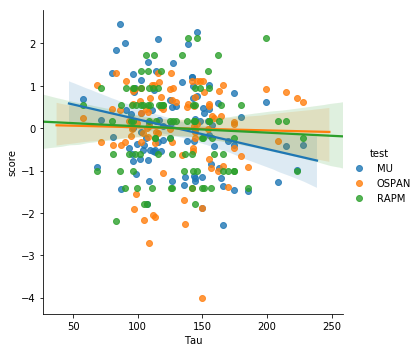

In [62]:
sns.lmplot(x="Tau", y="score", hue="test", data= mem_long_zscore_df)

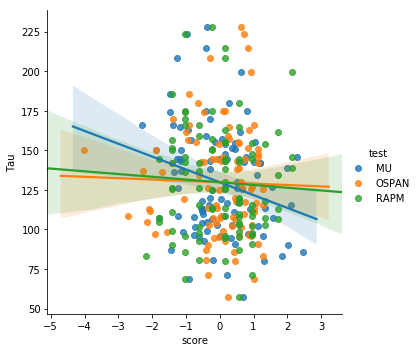

In [63]:
sns.lmplot(x="score", y="Tau", hue="test", data= mem_long_zscore_df)

## Reshaping Wide to Long for Plotting (Final Vers)

### Aesthetic Task

In [3]:
aes_df = pd.read_csv("Aes_Zscore_Final.csv", index_col = 0)
aes_df.head()

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp
0,1,-0.081524,-0.322953,1.342009,106.724458,152.070800,45.234478,4.607705
1,2,0.955907,0.918399,-0.620930,120.855988,154.362654,42.322657,4.350217
2,3,1.130691,0.363323,0.949421,111.727054,150.132526,40.677544,4.196172
3,4,0.465382,1.120244,-0.228342,172.398595,213.271239,78.252791,4.622512
4,5,0.899524,1.009229,1.734597,123.166384,153.375971,57.314410,5.075996


In [4]:
aes_test = aes_df[["subject", "Mem_Update", "OSPAN", "RAPM"]]
aes_test.head()

,subject,Mem_Update,OSPAN,RAPM
0,1,-0.081524,-0.322953,1.342009
1,2,0.955907,0.918399,-0.620930
2,3,1.130691,0.363323,0.949421
3,4,0.465382,1.120244,-0.228342
4,5,0.899524,1.009229,1.734597


In [15]:
aes_param = aes_df[["Mu", "Sigma", "Tau", "SCamp"]]
aes_param.head()

,Mu,Sigma,Tau,SCamp
0,152.070800,45.234478,106.724458,4.607705
1,154.362654,42.322657,120.855988,4.350217
2,150.132526,40.677544,111.727054,4.196172
3,213.271239,78.252791,172.398595,4.622512
4,153.375971,57.314410,123.166384,5.075996


In [13]:
aes_long_test = pd.melt(aes_test, id_vars = ["subject"], var_name = "Test", value_name = "Score")
aes_long_test = aes_long_test.reset_index(drop = True)
aes_long_test

,subject,Test,Score
0,1,Mem_Update,-0.081524
1,2,Mem_Update,0.955907
2,3,Mem_Update,1.130691
3,4,Mem_Update,0.465382
4,5,Mem_Update,0.899524
...,...,...,...
289,96,RAPM,0.556834
290,97,RAPM,0.164246
291,98,RAPM,0.556834
292,99,RAPM,1.734597


In [16]:
aes_param = pd.concat([aes_param, aes_param, aes_param])
aes_param = aes_param.reset_index(drop = True)
aes_param

,Mu,Sigma,Tau,SCamp
0,152.070800,45.234478,106.724458,4.607705
1,154.362654,42.322657,120.855988,4.350217
2,150.132526,40.677544,111.727054,4.196172
3,213.271239,78.252791,172.398595,4.622512
4,153.375971,57.314410,123.166384,5.075996
...,...,...,...,...
289,159.202541,43.798247,95.671618,5.177854
290,186.831475,40.267784,113.826038,5.360244
291,173.903990,52.259217,146.766366,6.095942
292,196.012139,48.068816,116.392222,4.655413


In [17]:
aes_long_df = pd.concat([aes_long_test, aes_param], axis = 1)
aes_long_df

,subject,Test,Score,Mu,Sigma,Tau,SCamp
0,1,Mem_Update,-0.081524,152.070800,45.234478,106.724458,4.607705
1,2,Mem_Update,0.955907,154.362654,42.322657,120.855988,4.350217
2,3,Mem_Update,1.130691,150.132526,40.677544,111.727054,4.196172
3,4,Mem_Update,0.465382,213.271239,78.252791,172.398595,4.622512
4,5,Mem_Update,0.899524,153.375971,57.314410,123.166384,5.075996
...,...,...,...,...,...,...,...
289,96,RAPM,0.556834,159.202541,43.798247,95.671618,5.177854
290,97,RAPM,0.164246,186.831475,40.267784,113.826038,5.360244
291,98,RAPM,0.556834,173.903990,52.259217,146.766366,6.095942
292,99,RAPM,1.734597,196.012139,48.068816,116.392222,4.655413


In [18]:
aes_long_df.to_csv("Aes_Long_Final.csv")

### Memorize Task

In [20]:
mem_df = pd.read_csv("Mem_Zscore_Final.csv", index_col = 0)
mem_df.head()

,subject,Mem_Update,OSPAN,RAPM,Tau,Mu,Sigma,SCamp
0,1,-0.081524,-0.322953,1.342009,102.721089,139.883892,37.807063,4.679519
1,2,0.955907,0.918399,-0.620930,97.656617,163.986945,57.422247,4.817836
2,3,1.130691,0.363323,0.949421,102.457896,124.041671,41.459446,3.981049
3,4,0.465382,1.120244,-0.228342,150.668076,208.590699,98.266527,4.165634
4,5,0.899524,1.009229,1.734597,112.829027,149.215281,64.349666,4.686260


In [21]:
mem_test = mem_df[["subject", "Mem_Update", "OSPAN", "RAPM"]]
mem_test.head()

,subject,Mem_Update,OSPAN,RAPM
0,1,-0.081524,-0.322953,1.342009
1,2,0.955907,0.918399,-0.620930
2,3,1.130691,0.363323,0.949421
3,4,0.465382,1.120244,-0.228342
4,5,0.899524,1.009229,1.734597


In [22]:
mem_param = mem_df = mem_df[["Mu", "Sigma", "Tau", "SCamp"]]
mem_param.head()

,Mu,Sigma,Tau,SCamp
0,139.883892,37.807063,102.721089,4.679519
1,163.986945,57.422247,97.656617,4.817836
2,124.041671,41.459446,102.457896,3.981049
3,208.590699,98.266527,150.668076,4.165634
4,149.215281,64.349666,112.829027,4.686260


In [23]:
mem_long_test = pd.melt(mem_test, id_vars = ["subject"], var_name = "Test", value_name = "Score")
mem_long_test = mem_long_test.reset_index(drop = True)
mem_long_test

,subject,Test,Score
0,1,Mem_Update,-0.081524
1,2,Mem_Update,0.955907
2,3,Mem_Update,1.130691
3,4,Mem_Update,0.465382
4,5,Mem_Update,0.899524
...,...,...,...
289,96,RAPM,0.556834
290,97,RAPM,0.164246
291,98,RAPM,0.556834
292,99,RAPM,1.734597


In [24]:
mem_param = pd.concat([mem_param, mem_param, mem_param])
mem_param = mem_param.reset_index(drop = True)
mem_param

,Mu,Sigma,Tau,SCamp
0,139.883892,37.807063,102.721089,4.679519
1,163.986945,57.422247,97.656617,4.817836
2,124.041671,41.459446,102.457896,3.981049
3,208.590699,98.266527,150.668076,4.165634
4,149.215281,64.349666,112.829027,4.686260
...,...,...,...,...
289,166.328992,46.483953,117.648505,5.315152
290,179.387099,48.134280,94.897275,5.367663
291,130.022492,50.052154,142.656224,5.470351
292,173.345881,58.116578,134.467817,4.214751


In [25]:
mem_long_df = pd.concat([mem_long_test, mem_param], axis = 1)
mem_long_df

,subject,Test,Score,Mu,Sigma,Tau,SCamp
0,1,Mem_Update,-0.081524,139.883892,37.807063,102.721089,4.679519
1,2,Mem_Update,0.955907,163.986945,57.422247,97.656617,4.817836
2,3,Mem_Update,1.130691,124.041671,41.459446,102.457896,3.981049
3,4,Mem_Update,0.465382,208.590699,98.266527,150.668076,4.165634
4,5,Mem_Update,0.899524,149.215281,64.349666,112.829027,4.686260
...,...,...,...,...,...,...,...
289,96,RAPM,0.556834,166.328992,46.483953,117.648505,5.315152
290,97,RAPM,0.164246,179.387099,48.134280,94.897275,5.367663
291,98,RAPM,0.556834,130.022492,50.052154,142.656224,5.470351
292,99,RAPM,1.734597,173.345881,58.116578,134.467817,4.214751


In [26]:
mem_long_df.to_csv("Mem_Long_Final.csv")

## Checking the Spread of the Individual Difference Measures

In [2]:
raw_ids = pd.read_csv("ID_Raw_Part.csv", index_col = 0)
raw_ids

,MU_Partial,OSPAN_Partial,RAPM
0,0.489216,0.840,0.750000
1,0.669608,0.963,0.333333
2,0.700000,0.908,0.666667
3,0.584314,0.983,0.416667
4,0.659804,0.972,0.833333
...,...,...,...
93,0.590196,0.946,0.583333
94,0.562745,0.854,0.500000
95,0.678431,0.826,0.583333
96,0.694118,0.810,0.833333


In [3]:
raw_ids.mean(axis = 0)

MU_Partial       0.503391
OSPAN_Partial    0.872000
RAPM             0.465136
dtype: float64

In [4]:
raw_ids.std(axis = 0)

MU_Partial       0.174778
OSPAN_Partial    0.099595
RAPM             0.213358
dtype: float64

In [5]:
raw_ids.max(axis = 0)

MU_Partial       0.932353
OSPAN_Partial    1.000000
RAPM             0.916667
dtype: float64

In [6]:
raw_ids.min(axis = 0)

MU_Partial       0.103922
OSPAN_Partial    0.475000
RAPM             0.000000
dtype: float64

## Correlations for ID Measures

In [2]:
raw_ids = pd.read_csv("ID_Raw_Part.csv", index_col = 0)
raw_ids

,MU_Partial,OSPAN_Partial,RAPM
0,0.489216,0.840,0.750000
1,0.669608,0.963,0.333333
2,0.700000,0.908,0.666667
3,0.584314,0.983,0.416667
4,0.659804,0.972,0.833333
...,...,...,...
93,0.590196,0.946,0.583333
94,0.562745,0.854,0.500000
95,0.678431,0.826,0.583333
96,0.694118,0.810,0.833333


In [5]:
corr_ids = raw_ids.corr(method = "pearson")
corr_ids

,MU_Partial,OSPAN_Partial,RAPM
MU_Partial,1.000000,0.331823,0.268890
OSPAN_Partial,0.331823,1.000000,0.163821
RAPM,0.268890,0.163821,1.000000


In [34]:
stats.pearsonr(raw_ids["MU_Partial"], raw_ids["OSPAN_Partial"])

(0.33182261750972947, 0.0008443577858882231)

In [35]:
stats.pearsonr(raw_ids["MU_Partial"], raw_ids["RAPM"])

(0.2688901698884411, 0.007423585382100446)

In [36]:
stats.pearsonr(raw_ids["OSPAN_Partial"], raw_ids["RAPM"])

(0.16382114110257717, 0.10699498072059807)

## T-test for ID Measures Against Luke

In [4]:
stats.ttest_1samp(raw_ids["OSPAN_Partial"], 0.77)

Ttest_1sampResult(statistic=10.138550743135735, pvalue=6.734087770679402e-17)

## Correlations for Ex-Gauss (Aesthetic and Memorization)

In [19]:
aes_final = pd.read_csv("Aes_Zscore_Final.csv", usecols = ["Mu", "Sigma", "Tau", "SCamp"])
aes_final.head()

,Tau,Mu,Sigma,SCamp
0,106.724458,152.070800,45.234478,4.607705
1,120.855988,154.362654,42.322657,4.350217
2,111.727054,150.132526,40.677544,4.196172
3,172.398595,213.271239,78.252791,4.622512
4,123.166384,153.375971,57.314410,5.075996


In [20]:
mem_final = pd.read_csv("Mem_Zscore_Final.csv", usecols = ["Mu", "Sigma", "Tau", "SCamp"])
mem_final.head()

,Tau,Mu,Sigma,SCamp
0,102.721089,139.883892,37.807063,4.679519
1,97.656617,163.986945,57.422247,4.817836
2,102.457896,124.041671,41.459446,3.981049
3,150.668076,208.590699,98.266527,4.165634
4,112.829027,149.215281,64.349666,4.686260


In [21]:
aes_mem_corr = aes_final.corrwith(mem_final, method = "pearson")
aes_mem_corr

Tau      0.783141
Mu       0.750432
Sigma    0.690365
SCamp    0.809623
dtype: float64

In [37]:
stats.pearsonr(aes_final["Mu"], mem_final["Mu"])

(0.7504324351652782, 5.847845857302603e-19)

In [38]:
stats.pearsonr(aes_final["Sigma"], mem_final["Sigma"])

(0.6903647044819988, 3.713101417962041e-15)

In [39]:
stats.pearsonr(aes_final["Tau"], mem_final["Tau"])

(0.7831408917973808, 1.6088730337365914e-21)

In [40]:
stats.pearsonr(aes_final["SCamp"], mem_final["SCamp"])

(0.809623483929854, 6.092109806126978e-24)

### Running T-Test Against Luke Paper

In [23]:
stats.ttest_1samp(aes_final["Mu"], 167)

Ttest_1sampResult(statistic=-1.3219717350823466, pvalue=0.18928664172161597)

In [24]:
stats.ttest_1samp(mem_final["Mu"], 167)

Ttest_1sampResult(statistic=-5.051938558771669, pvalue=2.0548402948617527e-06)

In [27]:
stats.ttest_1samp(aes_final["Sigma"], 49)

Ttest_1sampResult(statistic=0.09945160490640739, pvalue=0.9209849575408628)

In [28]:
stats.ttest_1samp(mem_final["Sigma"], 49)

Ttest_1sampResult(statistic=-0.8170786634642069, pvalue=0.4158858004333975)

In [25]:
stats.ttest_1samp(aes_final["Tau"], 102)

Ttest_1sampResult(statistic=5.579992652016317, pvalue=2.178794762069022e-07)

In [26]:
stats.ttest_1samp(mem_final["Tau"], 102)

Ttest_1sampResult(statistic=8.056433701021103, pvalue=2.035887874663208e-12)

In [29]:
stats.ttest_1samp(aes_final["SCamp"], 4.48)

Ttest_1sampResult(statistic=2.154267538755623, pvalue=0.03369620459770081)

In [30]:
stats.ttest_1samp(mem_final["SCamp"], 4.48)

Ttest_1sampResult(statistic=0.1796273305411247, pvalue=0.8578198488848501)

## MISC BELOW

In [89]:
main_sort = dup_drop_df.sort_values(by = [2])
main_sort

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
152,153,2,15,4,33,7,264.083989,97.845651,12.419354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.632854,0.0,0.0,278.750000,63.693112
93,94,2,28,4,1,7,242.881440,86.313957,182.270816,45.904050,45.583816,65.686917,0.441965,-0.748188,-0.472876,-47.662244,0.0,0.0,398.350000,102.654725
179,180,2,47,4,33,3,144.984848,0.071244,160.203121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-75.989370,0.0,0.0,277.075000,91.850078
108,109,2,56,4,1,8,171.840460,52.159244,108.458228,26.953352,32.625509,37.365381,0.757101,-0.866687,-0.759675,-90.170608,0.0,0.0,266.050000,64.867037
100,101,2,64,4,1,11,123.779416,63.558374,165.121578,23.211646,22.751768,35.001480,0.451035,-0.705749,-0.433317,-104.488179,0.0,0.0,264.975000,92.877456
6,7,2,78,4,1,7,210.131607,72.025253,202.215205,27.610923,37.793857,42.673046,0.584027,-0.756697,-0.575482,-125.513590,0.0,0.0,381.025000,109.437708
12,13,2,79,4,35,5,135.432362,0.108108,248.932430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-127.368242,0.0,0.0,341.425000,131.110419
170,171,2,102,4,3,8,154.664555,42.486852,178.192544,16.450876,35.987075,29.049479,0.570091,-0.700210,-0.545707,-164.134077,0.0,0.0,303.925000,96.012770
82,83,2,118,4,1,4,141.649681,58.715616,108.093295,19.479373,19.455933,26.021837,0.731689,-0.865547,-0.736493,-189.942500,0.0,0.0,236.150000,65.513071
166,167,2,137,4,1,23,162.570911,10.341806,177.355021,29.627764,397.829502,19.387394,-0.954800,-0.217702,0.073901,-221.284275,0.0,0.0,306.950000,98.373612


In [90]:
check_sort = trial_number.sort_values(by = "count")
check_sort

,Subject,count
79,80,15
0,1,414
92,93,935
37,38,1089
72,73,1099
43,44,1142
51,52,1158
32,33,1174
48,49,1228
93,94,1247


In [88]:
trial_check_df = pd.merge(left = trial_number, right = dup_drop_df, left_on = "count", right_on = dup_drop_df[2], how = "inner")
trial_check_df

,Subject,count,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,1,414,1,2,414,4,1,7,152.070800,45.234478,...,11.881089,12.553571,0.744089,-0.849858,-0.741992,-666.985666,0.0,0.0,243.674999,60.373562
1,33,1174,64,2,1174,4,1,8,146.434433,53.474968,...,7.485715,8.422993,0.711919,-0.826399,-0.698159,-1891.804968,0.0,0.0,258.500000,73.676659
2,38,1089,73,2,1089,4,1,11,140.664178,31.764163,...,69.947406,15.177273,0.582164,-0.715548,-0.809654,-1752.712669,0.0,0.0,326.099999,117.687807
3,44,1142,84,2,1142,4,3,10,171.002653,69.531269,...,7.809762,10.069249,0.660156,-0.806755,-0.646167,-1838.316381,0.0,0.0,311.975000,93.065739
4,52,1158,99,2,1158,4,1,6,171.906097,66.451623,...,6.796845,9.007194,0.554401,-0.757408,-0.545780,-1867.822893,0.0,0.0,310.674999,92.308000
5,73,1099,140,2,1099,4,1,5,154.739439,64.958967,...,8.685790,10.533305,0.594331,-0.742249,-0.556162,-1769.179261,0.0,0.0,320.000001,106.083904
6,80,15,153,2,15,4,33,7,264.083989,97.845651,...,0.000000,0.000000,0.000000,0.000000,0.000000,-26.632854,0.0,0.0,278.750000,63.693112
7,93,935,178,2,935,4,1,12,120.785780,34.180375,...,13.221112,8.856995,0.497404,-0.657654,-0.503881,-1505.394529,0.0,0.0,264.750001,92.142892


In [91]:
#average log likelihood of the qmpe results
dup_drop_df[15].mean()

-759.1844724456249

In [96]:
#average log likelihood of retimes
r_df = pd.read_csv("Aesthetic_Log.csv")
r_df["log_like"].mean()

-9577.2908335506

In [97]:
dup_drop_df[9].mean()

10.171136332916666

In [98]:
dup_drop_df[10].mean()

16.84197828666667

In [99]:
dup_drop_df[11].mean()

14.148091675208336

In [ ]:
#look into exGauss reports of fit and visualizations


In [161]:
r_df

,mu,sig,tau,subject
0,142.443092,39.936263,127.313788,1
1,153.267806,42.519420,125.096983,2
2,147.580308,42.932562,116.781328,3
3,208.951028,66.551975,175.292647,4
4,147.970036,56.856559,131.537101,5
5,141.557436,40.414007,102.364968,6
6,147.460961,36.767607,192.825549,7
7,184.799738,46.683493,104.118802,8
8,188.172424,51.973978,108.490926,9
9,142.533082,36.912419,114.223494,10


In [104]:
#standard deviations for retimes aesthetic
mu_r_sd = r_df["mu"].std()
sig_r_sd = r_df["sig"].std()
tau_r_sd = r_df["tau"].std()
print(mu_r_sd, sig_r_sd, tau_r_sd)

20.717920700252254 9.107056052900333 32.68360211172908


In [162]:
r_mem_df

,mu,sig,tau,subject
0,136.765962,36.553955,114.650537,1
1,158.130049,46.087619,106.811566,2
2,122.560264,42.555903,105.085718,3
3,193.751358,70.791642,174.458505,4
4,147.001752,60.338376,116.974655,5
5,134.048748,38.596456,124.016891,6
6,126.701981,39.572842,186.167076,7
7,177.378133,50.789348,107.574759,8
8,186.297472,54.116002,118.810707,9
9,130.047102,36.133855,123.852895,10


In [163]:
mu_rmem_sd = r_mem_df["mu"].std()
sig_rmem_sd = r_mem_df["sig"].std()
tau_rmem_sd = r_mem_df["tau"].std()
print(mu_rmem_sd, sig_rmem_sd, tau_rmem_sd)

20.661098476939785 9.292495220179285 34.09039095710018


In [119]:
#making a dataframe with subject, raw mean, mu for aesthetic task
#selecting subject and duration times
aes_df = pd.read_csv("SM01_Retest_Aesthetic_Task.csv")
sub_mean_df = aes_df[["subj", "durs"]]
#collapsing across subject to find raw means 
sub_mean_df= sub_mean_df.groupby("subj").mean()
sub_mean_df = sub_mean_df.reset_index()
sub_mean_df

,subj,durs
0,1,269.770531
1,2,278.331465
2,3,264.361930
3,4,384.241002
4,5,279.503582
5,6,243.913221
6,7,340.229085
7,8,288.918341
8,9,296.678990
9,10,256.754813


In [115]:
fit_mean_df = r_df[["mu"]]
fit_mean_df

,mu
0,145.205206
1,154.171028
2,145.483396
3,203.757178
4,146.715656
5,141.143512
6,146.472579
7,184.414116
8,186.875815
9,140.026759


In [126]:
qq_df = pd.concat([sub_mean_df, fit_mean_df], axis= 1)
qq_df = qq_df.rename(columns = {"durs":"raw_mean"})
qq_df

,subj,raw_mean,mu
0,1,269.770531,145.205206
1,2,278.331465,154.171028
2,3,264.361930,145.483396
3,4,384.241002,203.757178
4,5,279.503582,146.715656
5,6,243.913221,141.143512
6,7,340.229085,146.472579
7,8,288.918341,184.414116
8,9,296.678990,186.875815
9,10,256.754813,140.026759


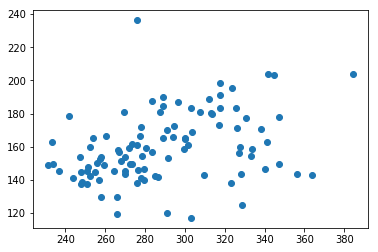

In [127]:
plt.scatter(qq_df["raw_mean"], qq_df["mu"])
plt.show()

In [107]:
from statsmodels.graphics.gofplots import qqplot_2samples

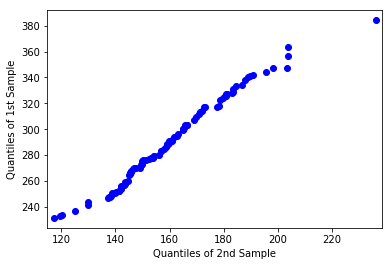

In [129]:
x = sm.ProbPlot(qq_df["raw_mean"])
y = sm.ProbPlot(qq_df["mu"])
qqplot_2samples(x,y)
plt.show()

In [133]:
#making a dataframe with subject, raw mean, mu for memorization task
mem_df = pd.read_csv("SM01_Retest_Memorize_Task.csv")
mem_mean_df = mem_df[["subj", "durs"]]
#collapsing across subject to find raw means 
mem_mean_df= mem_mean_df.groupby("subj").mean()
mem_mean_df = mem_mean_df.reset_index()
mem_mean_df

/Users/zoeloh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,subj,durs
0,1,251.455556
1,2,264.950028
2,3,227.677730
3,4,368.198609
4,5,263.948900
5,6,258.109967
6,7,312.826394
7,8,284.956488
8,9,305.097411
9,10,253.911328


In [134]:
r_mem_df = pd.read_csv("Memorize_Retest_Gauss.csv")
mem_mu_df = r_mem_df[["mu"]]
mem_mu_df

,mu
0,136.765962
1,158.130049
2,122.560264
3,193.751358
4,147.001752
5,134.048748
6,126.701981
7,177.378133
8,186.297472
9,130.047102


In [135]:
qq_mem_df = pd.concat([mem_mean_df, mem_mu_df], axis= 1)
qq_mem_df = qq_mem_df.rename(columns = {"durs":"raw_mean"})
qq_mem_df

,subj,raw_mean,mu
0,1,251.455556,136.765962
1,2,264.950028,158.130049
2,3,227.677730,122.560264
3,4,368.198609,193.751358
4,5,263.948900,147.001752
5,6,258.109967,134.048748
6,7,312.826394,126.701981
7,8,284.956488,177.378133
8,9,305.097411,186.297472
9,10,253.911328,130.047102


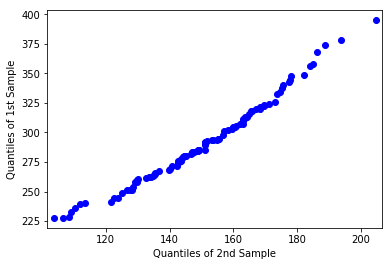

In [136]:
s = sm.ProbPlot(qq_mem_df["raw_mean"])
z = sm.ProbPlot(qq_mem_df["mu"])
qqplot_2samples(s,z)
plt.show()

In [137]:
qq_mem_df["raw_mean"].max()

394.89408396946567

In [138]:
qq_mem_df["mu"].max()

204.561240233393

In [103]:
#making a dataframe with subject, raw mean, mu for aesthetic task
#selecting subject and duration times
aes_df = pd.read_csv("SM01_Retest_Aesthetic_Task.csv")
sub_mean_df = aes_df[["subj", "durs"]]
#collapsing across subject to find raw means 
sub_mean_df= sub_mean_df.groupby("subj").mean()
sub_mean_df = sub_mean_df.reset_index()
#dropping subject 80
sub_mean_df = sub_mean_df.drop(sub_mean_df[sub_mean_df["subj"] == 80].index)
sub_mean_df = sub_mean_df.reset_index(drop =True)
sub_mean_df

,subj,durs
0,1,269.770531
1,2,278.331465
2,3,264.361930
3,4,384.241002
4,5,279.503582
5,6,243.913221
6,7,340.229085
7,8,288.918341
8,9,296.678990
9,10,256.754813


In [98]:
fit_mean_df = both_qmpe_aes_df[[6]]
fit_mean_df

,6
0,152.070800
1,154.362654
2,150.132526
3,213.271239
4,153.375971
5,142.774136
6,150.662466
7,192.837692
8,190.251821
9,139.051999


In [105]:
qmpe_aes_qq_df = pd.concat([sub_mean_df, fit_mean_df], axis= 1)
qmpe_aes_qq_df = qmpe_aes_qq_df.rename(columns = {"durs":"raw_mean", 6: "mu"})
qmpe_aes_qq_df

,subj,raw_mean,mu
0,1,269.770531,152.070800
1,2,278.331465,154.362654
2,3,264.361930,150.132526
3,4,384.241002,213.271239
4,5,279.503582,153.375971
5,6,243.913221,142.774136
6,7,340.229085,150.662466
7,8,288.918341,192.837692
8,9,296.678990,190.251821
9,10,256.754813,139.051999


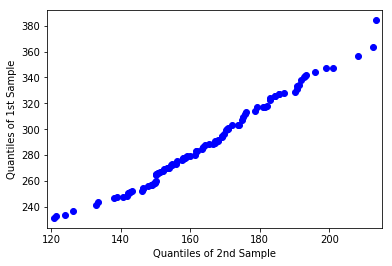

In [108]:
aes_raw = sm.ProbPlot(qmpe_aes_qq_df["raw_mean"])
aes_fit = sm.ProbPlot(qmpe_aes_qq_df["mu"])
qqplot_2samples(aes_raw, aes_fit)
plt.show()

In [109]:
#making a dataframe with subject, raw mean, mu for memorization task
mem_df = pd.read_csv("SM01_Retest_Memorize_Task.csv")
mem_mean_df = mem_df[["subj", "durs"]]
#collapsing across subject to find raw means 
mem_mean_df= mem_mean_df.groupby("subj").mean()
mem_mean_df = mem_mean_df.reset_index()
#dropping subject 80
mem_mean_df = mem_mean_df.drop(mem_mean_df[mem_mean_df["subj"] == 80].index)
mem_mean_df = mem_mean_df.reset_index(drop =True)
mem_mean_df

/Users/zoeloh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,subj,durs
0,1,251.455556
1,2,264.950028
2,3,227.677730
3,4,368.198609
4,5,263.948900
5,6,258.109967
6,7,312.826394
7,8,284.956488
8,9,305.097411
9,10,253.911328


In [110]:
mem_fit_mean_df = both_qmpe_mem_df[[6]]
mem_fit_mean_df

,6
0,139.883892
1,163.986945
2,124.041671
3,208.590699
4,149.215281
5,138.600175
6,132.957235
7,183.588432
8,188.511885
9,129.667358


In [111]:
qmpe_mem_qq_df = pd.concat([mem_mean_df, mem_fit_mean_df], axis= 1)
qmpe_mem_qq_df = qmpe_mem_qq_df.rename(columns = {"durs":"raw_mean", 6: "mu"})
qmpe_mem_qq_df

,subj,raw_mean,mu
0,1,251.455556,139.883892
1,2,264.950028,163.986945
2,3,227.677730,124.041671
3,4,368.198609,208.590699
4,5,263.948900,149.215281
5,6,258.109967,138.600175
6,7,312.826394,132.957235
7,8,284.956488,183.588432
8,9,305.097411,188.511885
9,10,253.911328,129.667358


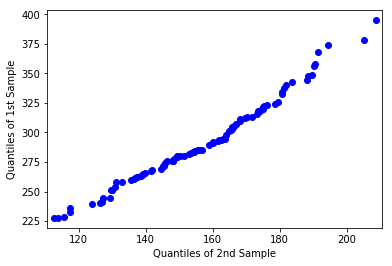

In [112]:
mem_raw = sm.ProbPlot(qmpe_mem_qq_df["raw_mean"])
mem_fit = sm.ProbPlot(qmpe_mem_qq_df["mu"])
qqplot_2samples(mem_raw, mem_fit)
plt.show()